# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1659/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

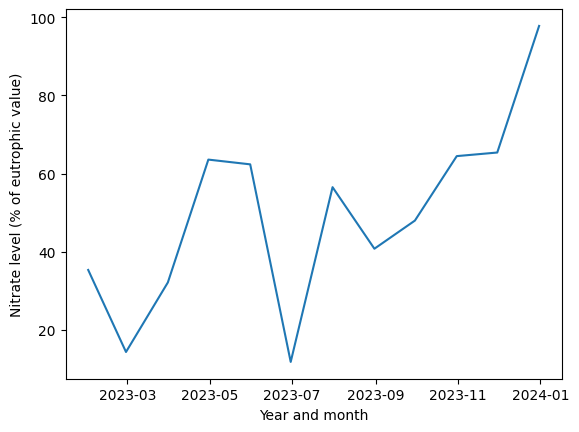

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_1659/1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

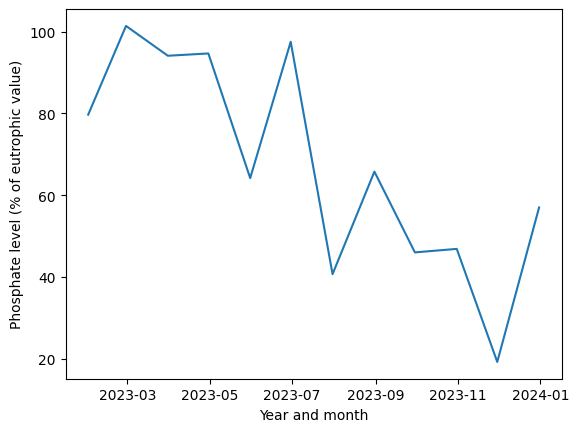

In [3]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

## Summarizing Data and Handling Inconsistent Data

### Dataset1: MEPS HC-244: MEPS Panel 26 Two-Year Longitudinal Data File (NEW)

In [2]:
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
!pip install pandas openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
ds1_meps = pd.read_excel("/workspaces/2025-spring-B2/DS1 - h244.xlsx")
#ds1_meps.info()

In [4]:
ds1_meps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Columns: 2737 entries, DUID to LSAQWT
dtypes: float64(24), int64(2693), object(20)
memory usage: 140.8+ MB


In [5]:
ds1_meps.head(10)

,DUID,PID,DUPERSID,PANEL,YEARIND,SAQRDS24,DATAYEARY2,ALL5RDS,DIED,INST,...,RXOSRY1,RXOSRY2,RXPTRY1,RXPTRY2,RXOTHY1,RXOTHY2,VARPSU,VARSTR,LONGWT,LSAQWT
0,2680001,101,2680001101,26,1,0,2022,1,0,0,...,0,0,0,0,0,0,1,2014,31510.685960,0.000000
1,2680001,102,2680001102,26,1,0,2022,1,0,0,...,0,0,65,0,0,0,1,2014,41870.992600,0.000000
2,2680006,101,2680006101,26,1,1,2022,1,0,0,...,0,0,6,13,0,0,2,2018,29437.873605,39369.470269
3,2680010,101,2680010101,26,1,1,2022,1,0,0,...,0,0,0,0,0,0,2,2002,21586.817670,24272.428247
4,2680015,101,2680015101,26,1,0,2022,1,0,0,...,0,0,598,2000,0,0,2,2074,42793.201436,0.000000
5,2680018,101,2680018101,26,1,1,2022,1,0,0,...,0,0,0,0,0,0,2,2064,65829.092152,76756.481682
6,2680018,102,2680018102,26,1,0,2022,0,1,0,...,0,0,0,0,0,0,2,2064,81768.470371,0.000000
7,2680020,101,2680020101,26,1,0,2022,1,0,0,...,0,0,13,23,0,0,1,2013,29619.174868,0.000000
8,2680020,102,2680020102,26,1,0,2022,1,0,0,...,0,0,0,32,0,0,1,2013,16246.033012,0.000000
9,2680022,101,2680022101,26,1,1,2022,1,0,0,...,0,0,0,0,0,0,1,2075,70804.859744,118896.326742


In [6]:
ds1_meps.describe()

,DUID,PID,DUPERSID,PANEL,YEARIND,SAQRDS24,DATAYEARY2,ALL5RDS,DIED,INST,...,RXOSRY1,RXOSRY2,RXPTRY1,RXPTRY2,RXOTHY1,RXOTHY2,VARPSU,VARSTR,LONGWT,LSAQWT
count,6.741000e+03,6741.000000,6.741000e+03,6741.0,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,...,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000
mean,2.684728e+06,102.202641,2.684728e+09,26.0,1.031894,0.475597,1989.288681,0.933838,0.022994,0.003115,...,0.005785,-0.008901,621.863967,681.911141,28.282451,28.422341,2.366118,2055.126984,49996.038645,38241.105807
std,2.747554e+03,4.733321,2.747554e+06,0.0,0.215891,0.499441,255.175679,0.248584,0.149894,0.055732,...,1.053803,0.462137,9181.818331,9068.790446,1214.393300,609.037490,1.343543,33.910594,40390.008691,59407.014502
min,2.680001e+06,101.000000,2.680001e+09,26.0,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,2001.000000,2300.450793,0.000000
25%,2.682340e+06,101.000000,2.682340e+09,26.0,1.000000,0.000000,2022.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2025.000000,23336.049273,0.000000
50%,2.684729e+06,102.000000,2.684729e+09,26.0,1.000000,0.000000,2022.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2052.000000,38822.860849,14895.686119
75%,2.687099e+06,103.000000,2.687099e+09,26.0,1.000000,1.000000,2022.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,2084.000000,64372.684108,54873.558433
max,2.689506e+06,302.000000,2.689506e+09,26.0,3.000000,1.000000,2022.000000,1.000000,1.000000,1.000000,...,86.000000,35.000000,629851.000000,648313.000000,95476.000000,37826.000000,8.000000,2117.000000,367953.505563,540104.304709


In [44]:
# List numerical columns (int/float)
numerical_cols = ds1_meps.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['DUID', 'PID', 'DUPERSID', 'PANEL', 'YEARIND', 'SAQRDS24', 'DATAYEARY2', 'ALL5RDS', 'DIED', 'INST', 'MILITARY', 'ENTRSRVY', 'LEFTUS', 'OTHER', 'FCSZY1', 'FCSZY2', 'FCRPY1', 'FCRPY2', 'RUSIZE1', 'RUSIZE2', 'RUSIZE3', 'RUSIZE4', 'RUSIZE5', 'RUSIZEY1', 'RUSIZEY2', 'RUCLAS1', 'RUCLAS2', 'RUCLAS3', 'RUCLAS4', 'RUCLAS5', 'RUCLASY1', 'RUCLASY2', 'FAMSZE1', 'FAMSZE2', 'FAMSZE3', 'FAMSZE4', 'FAMSZE5', 'FAMSZEY1', 'FAMSZEY2', 'FMRSY1', 'FMRSY2', 'FAMSY1', 'FAMSY2', 'FAMSZYR1', 'FAMSZYR2', 'FAMRFPY1', 'FAMRFPY2', 'REGION1', 'REGION2', 'REGION3', 'REGION4', 'REGION5', 'REGIONY1', 'REGIONY2', 'REFPRS1', 'REFPRS2', 'REFPRS3', 'REFPRS4', 'REFPRS5', 'REFPRSY1', 'REFPRSY2', 'RESP1', 'RESP2', 'RESP3', 'RESP4', 'RESP5', 'RESPY1', 'RESPY2', 'PROXY1', 'PROXY2', 'PROXY3', 'PROXY4', 'PROXY5', 'PROXYY1', 'PROXYY2', 'INTVLANG', 'INTVTYPE3', 'INTVTYPE4', 'INTVTYPE5', 'BEGRFM1', 'BEGRFM2', 'BEGRFM3', 'BEGRFM4', 'BEGRFM5', 'BEGRFY1', 'BEGRFY2', 'BEGRFY3', 'BEGRFY4', 'BEGRFY5', 'ENDRFM1', 'ENDR

In [46]:
print(f"Total numerical columns (preliminary): {len(numerical_cols)}")

Total numerical columns (preliminary): 2717


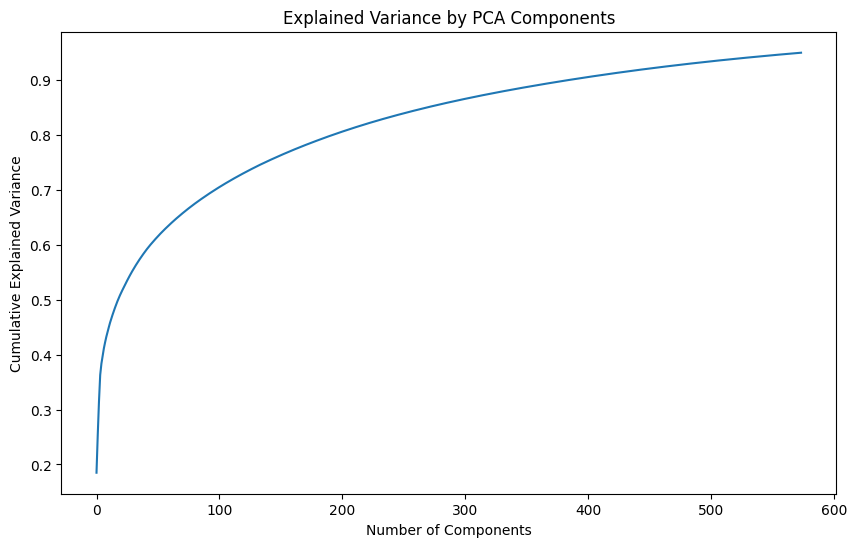

Top features in Component 0:
PNEJAY2: 0.0407
PNEFEY2: 0.0407
HPOFEY2: 0.0404
INSCOP3: -0.0404
HPOJAY2: 0.0404
GVBFEY2: 0.0404
PNEDEY1: 0.0404
GVCFEY2: 0.0403
GVBJAY2: 0.0403
PNEMAY2: 0.0403


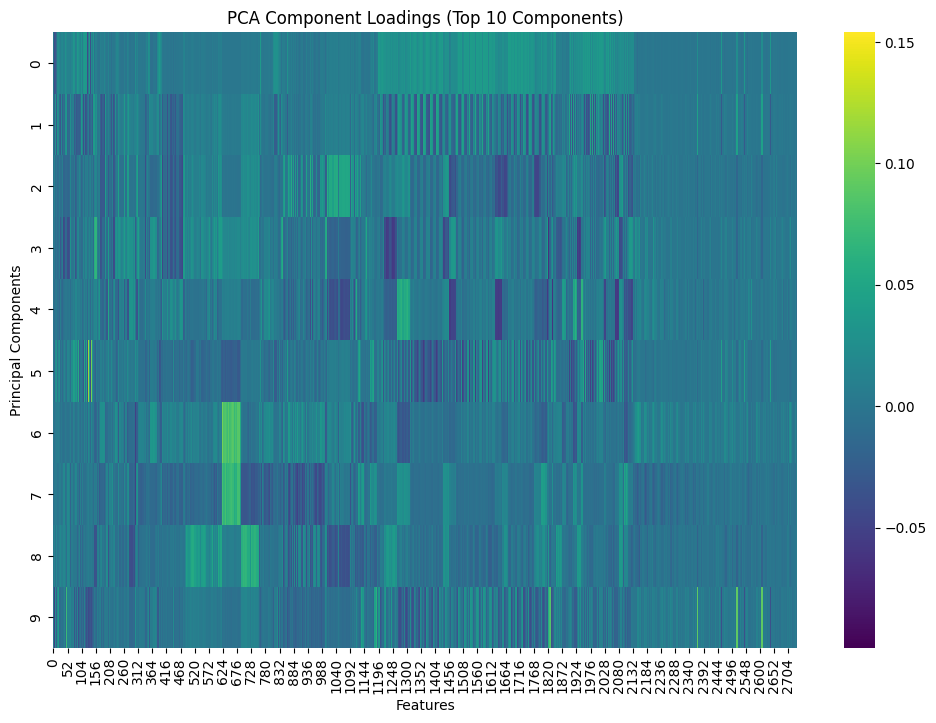

In [7]:
# Option A: Principle Component Analysis to find the Top 10 Features 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Preprocessing
# Handle missing values (if any)
# Example: Fill numerical missing values with mean/median
df1= ds1_meps.fillna(ds1_meps.median(numeric_only=True))

# Encode categorical variables (if any object columns exist)
# Example: Label encode categorical columns (if applicable)
from sklearn.preprocessing import LabelEncoder
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = LabelEncoder().fit_transform(df1[col])

# Step 2: Standardize the data (critical for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Step 3: Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_result = pca.fit_transform(scaled_data)

# Step 4: Analyze results
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Identify top components
n_top_components = 10  # Adjust based on variance plot
top_components = pca.components_[:n_top_components]

# Function to extract top features for a component
def get_top_features(component, feature_names, n=10):
    loadings = list(zip(feature_names, component))
    loadings.sort(key=lambda x: abs(x[1]), reverse=True)
    return loadings[:n]

# Example: Analyze the first component
top_features_component_0 = get_top_features(pca.components_[0], df1.columns)
print("Top features in Component 0:")
for feature, loading in top_features_component_0:
    print(f"{feature}: {loading:.4f}")

# Optional: Heatmap of component loadings
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_[:10], cmap='viridis', annot=False)
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('PCA Component Loadings (Top 10 Components)')
plt.show()

### These columns could be considered as Target for this Dataset1;
'TOTEXPY1', 'TOTEXPY2','TOTTCHY1', 'TOTTCHY2', 'ERTOTY1', 'ERTOTY2', 'ERTEXPY1', 'ERTEXPY2', 'IPFEXPY1', 'IPFEXPY2', 'RXEXPY1', 'RXEXPY2'

And there could be more. I am going to consider one Target, which is "TOTEXPY1"

In [8]:
selected_features = [
    'PNEJAY2', 'PNEFEY2', 'HPOFEY2', 'INSCOP3', 'HPOJAY2', 'GVBFEY2', 'PNEDEY1',
    'GVCFEY2', 'GVBJAY2', 'PNEMAY2', 'TOTEXPY1'
]

# Step 1: Select the relevant columns from the original DataFrame
des1_meps_top_20a = df1[selected_features]

# Step 2: Display the first few rows of the new DataFrame
des1_meps_top_20a.head(10)

,PNEJAY2,PNEFEY2,HPOFEY2,INSCOP3,HPOJAY2,GVBFEY2,PNEDEY1,GVCFEY2,GVBJAY2,PNEMAY2,TOTEXPY1
0,2,2,2,1,2,2,2,2,2,2,0
1,2,2,2,1,2,2,2,2,2,2,797
2,2,2,2,1,2,2,2,2,2,2,4656
3,2,2,2,1,2,2,2,2,2,2,11127
4,2,2,2,1,2,2,2,2,2,2,3432
5,2,2,2,1,2,2,2,2,2,2,1612
6,2,2,2,1,2,2,2,2,2,2,5223
7,2,2,2,1,2,2,2,2,2,2,439
8,2,2,2,1,2,2,2,2,2,2,2415
9,2,2,2,1,2,2,2,2,2,2,958


In [9]:
des1_meps_top_20a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PNEJAY2   6741 non-null   int64
 1   PNEFEY2   6741 non-null   int64
 2   HPOFEY2   6741 non-null   int64
 3   INSCOP3   6741 non-null   int64
 4   HPOJAY2   6741 non-null   int64
 5   GVBFEY2   6741 non-null   int64
 6   PNEDEY1   6741 non-null   int64
 7   GVCFEY2   6741 non-null   int64
 8   GVBJAY2   6741 non-null   int64
 9   PNEMAY2   6741 non-null   int64
 10  TOTEXPY1  6741 non-null   int64
dtypes: int64(11)
memory usage: 579.4 KB


In [10]:
des1_meps_top_20a.describe()

,PNEJAY2,PNEFEY2,HPOFEY2,INSCOP3,HPOJAY2,GVBFEY2,PNEDEY1,GVCFEY2,GVBJAY2,PNEMAY2,TOTEXPY1
count,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.00000,6741.000000,6741.000000,6.741000e+03
mean,1.928497,1.923008,1.918113,1.103842,1.923750,1.917816,1.931167,1.91752,1.923305,1.921377,8.612276e+03
std,0.455031,0.471603,0.475950,0.704512,0.459455,0.476210,0.446560,0.47647,0.459865,0.476811,3.515008e+04
min,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000e+00
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,4.380000e+02
50%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.973000e+03
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,6.794000e+03
max,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.187290e+06


           PNEJAY2   PNEFEY2   HPOFEY2   INSCOP3   HPOJAY2   GVBFEY2  \
PNEJAY2   1.000000  0.938139  0.922476 -0.895994  0.983069  0.921873   
PNEFEY2   0.938139  1.000000  0.983240 -0.866811  0.921940  0.982600   
HPOFEY2   0.922476  0.983240  1.000000 -0.857379  0.938275  0.971852   
INSCOP3  -0.895994 -0.866811 -0.857379  1.000000 -0.885842 -0.856818   
HPOJAY2   0.983069  0.921940  0.938275 -0.885842  1.000000  0.911212   
GVBFEY2   0.921873  0.982600  0.971852 -0.856818  0.911212  1.000000   
PNEDEY1   0.954194  0.893506  0.878176 -0.905382  0.937627  0.877600   
GVCFEY2   0.921272  0.981962  0.971214 -0.856258  0.910611  0.982999   
GVBJAY2   0.982040  0.920960  0.910834 -0.884909  0.970859  0.938010   
PNEMAY2   0.877435  0.940354  0.924840 -0.844914  0.862541  0.924231   
TOTEXPY1 -0.030796 -0.035949 -0.036770  0.007844 -0.031908 -0.035587   

           PNEDEY1   GVCFEY2   GVBJAY2   PNEMAY2  TOTEXPY1  
PNEJAY2   0.954194  0.921272  0.982040  0.877435 -0.030796  
PNEFEY2   0.8

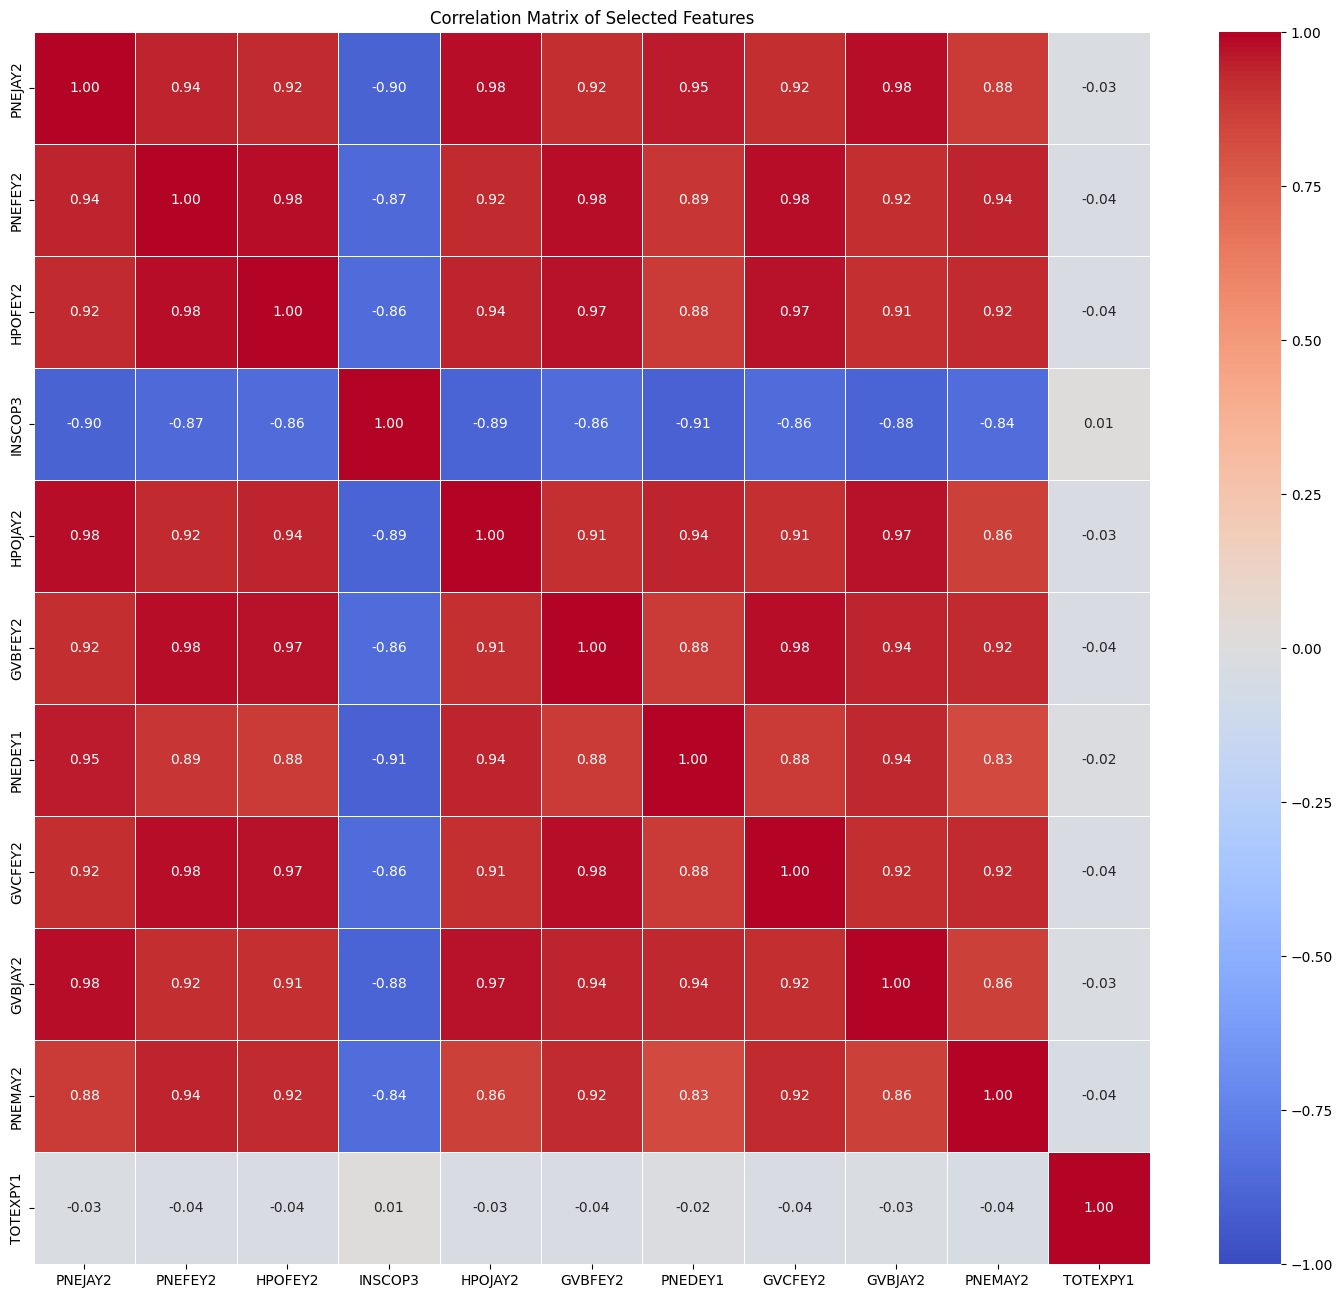

In [ ]:
# Finding the correlation among 10 Features selected

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix of the selected features
correlation_matrix = des1_meps_top_20a.corr()

# Step 2: Display the correlation matrix
print(correlation_matrix)

# Step3: Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Correlation Matrix of Selected Features")
# plt.show()

# Step 2: Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 16))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Step 3: Add title and display the heatmap
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [12]:
# Option B: Use the ANOVA F-test to find another set of 10 Features

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (if any object columns exist)
# Example: Label encode categorical columns (if applicable)
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = LabelEncoder().fit_transform(df1[col])

# Assume 'TOTEXPY1' is your target variable
X = df1.drop('TOTEXPY1', axis=1)  # Drop the target column for feature selection
y = df1['TOTEXPY1']  # Assume the target column is named 'target'

# Scale the data (make sure to apply scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use SelectKBest with f_classif (ANOVA F-test) for regression problems
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Top 20 Selected Features:", selected_features)


Top 20 Selected Features: Index(['HHAVAY1', 'HHATRIY1', 'HHAOSRY1', 'HHNVAY1', 'HHNTRIY1', 'HHNOSRY1',
       'HHNOTHY1', 'VISSTLY1', 'OTHSTLY1', 'RXOSRY1'],
      dtype='object')


/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   3 2314 2342 2344 2372 2374 2378 2482 2486 2490 2494 2510 2514 2518
 2522 2536 2538 2542 2546 2550 2600 2602 2610 2630 2632 2640 2644 2666
 2694 2726] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/home/codespace/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [13]:
selected_features2 = ['HHAVAY1', 'HHATRIY1', 'HHAOSRY1', 'HHNVAY1', 'HHNTRIY1', 'HHNOSRY1',
       'HHNOTHY1', 'VISSTLY1', 'OTHSTLY1', 'RXOSRY1', 'TOTEXPY1'
]

# Step 1: Select the relevant columns from the original DataFrame
des1_meps_top_20b = df1[selected_features2]

# Step 2: Display the first few rows of the new DataFrame
des1_meps_top_20b.head()

,HHAVAY1,HHATRIY1,HHAOSRY1,HHNVAY1,HHNTRIY1,HHNOSRY1,HHNOTHY1,VISSTLY1,OTHSTLY1,RXOSRY1,TOTEXPY1
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,797
2,0,0,0,0,0,0,0,0,0,0,4656
3,0,0,0,0,0,0,0,0,0,0,11127
4,0,0,0,0,0,0,0,0,0,0,3432


In [14]:
des1_meps_top_20b.describe()

,HHAVAY1,HHATRIY1,HHAOSRY1,HHNVAY1,HHNTRIY1,HHNOSRY1,HHNOTHY1,VISSTLY1,OTHSTLY1,RXOSRY1,TOTEXPY1
count,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6.741000e+03
mean,1.557632,0.069871,1.054740,0.022400,0.039905,0.923750,0.923750,0.058893,0.588192,0.005785,8.612276e+03
std,126.143980,6.382888,70.540016,2.486331,3.922965,76.488882,76.488882,5.481688,37.786553,1.053803,3.515008e+04
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380000e+02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.973000e+03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.794000e+03
max,10355.000000,524.000000,5639.000000,204.000000,322.000000,6280.000000,6280.000000,450.000000,3000.000000,86.000000,2.187290e+06


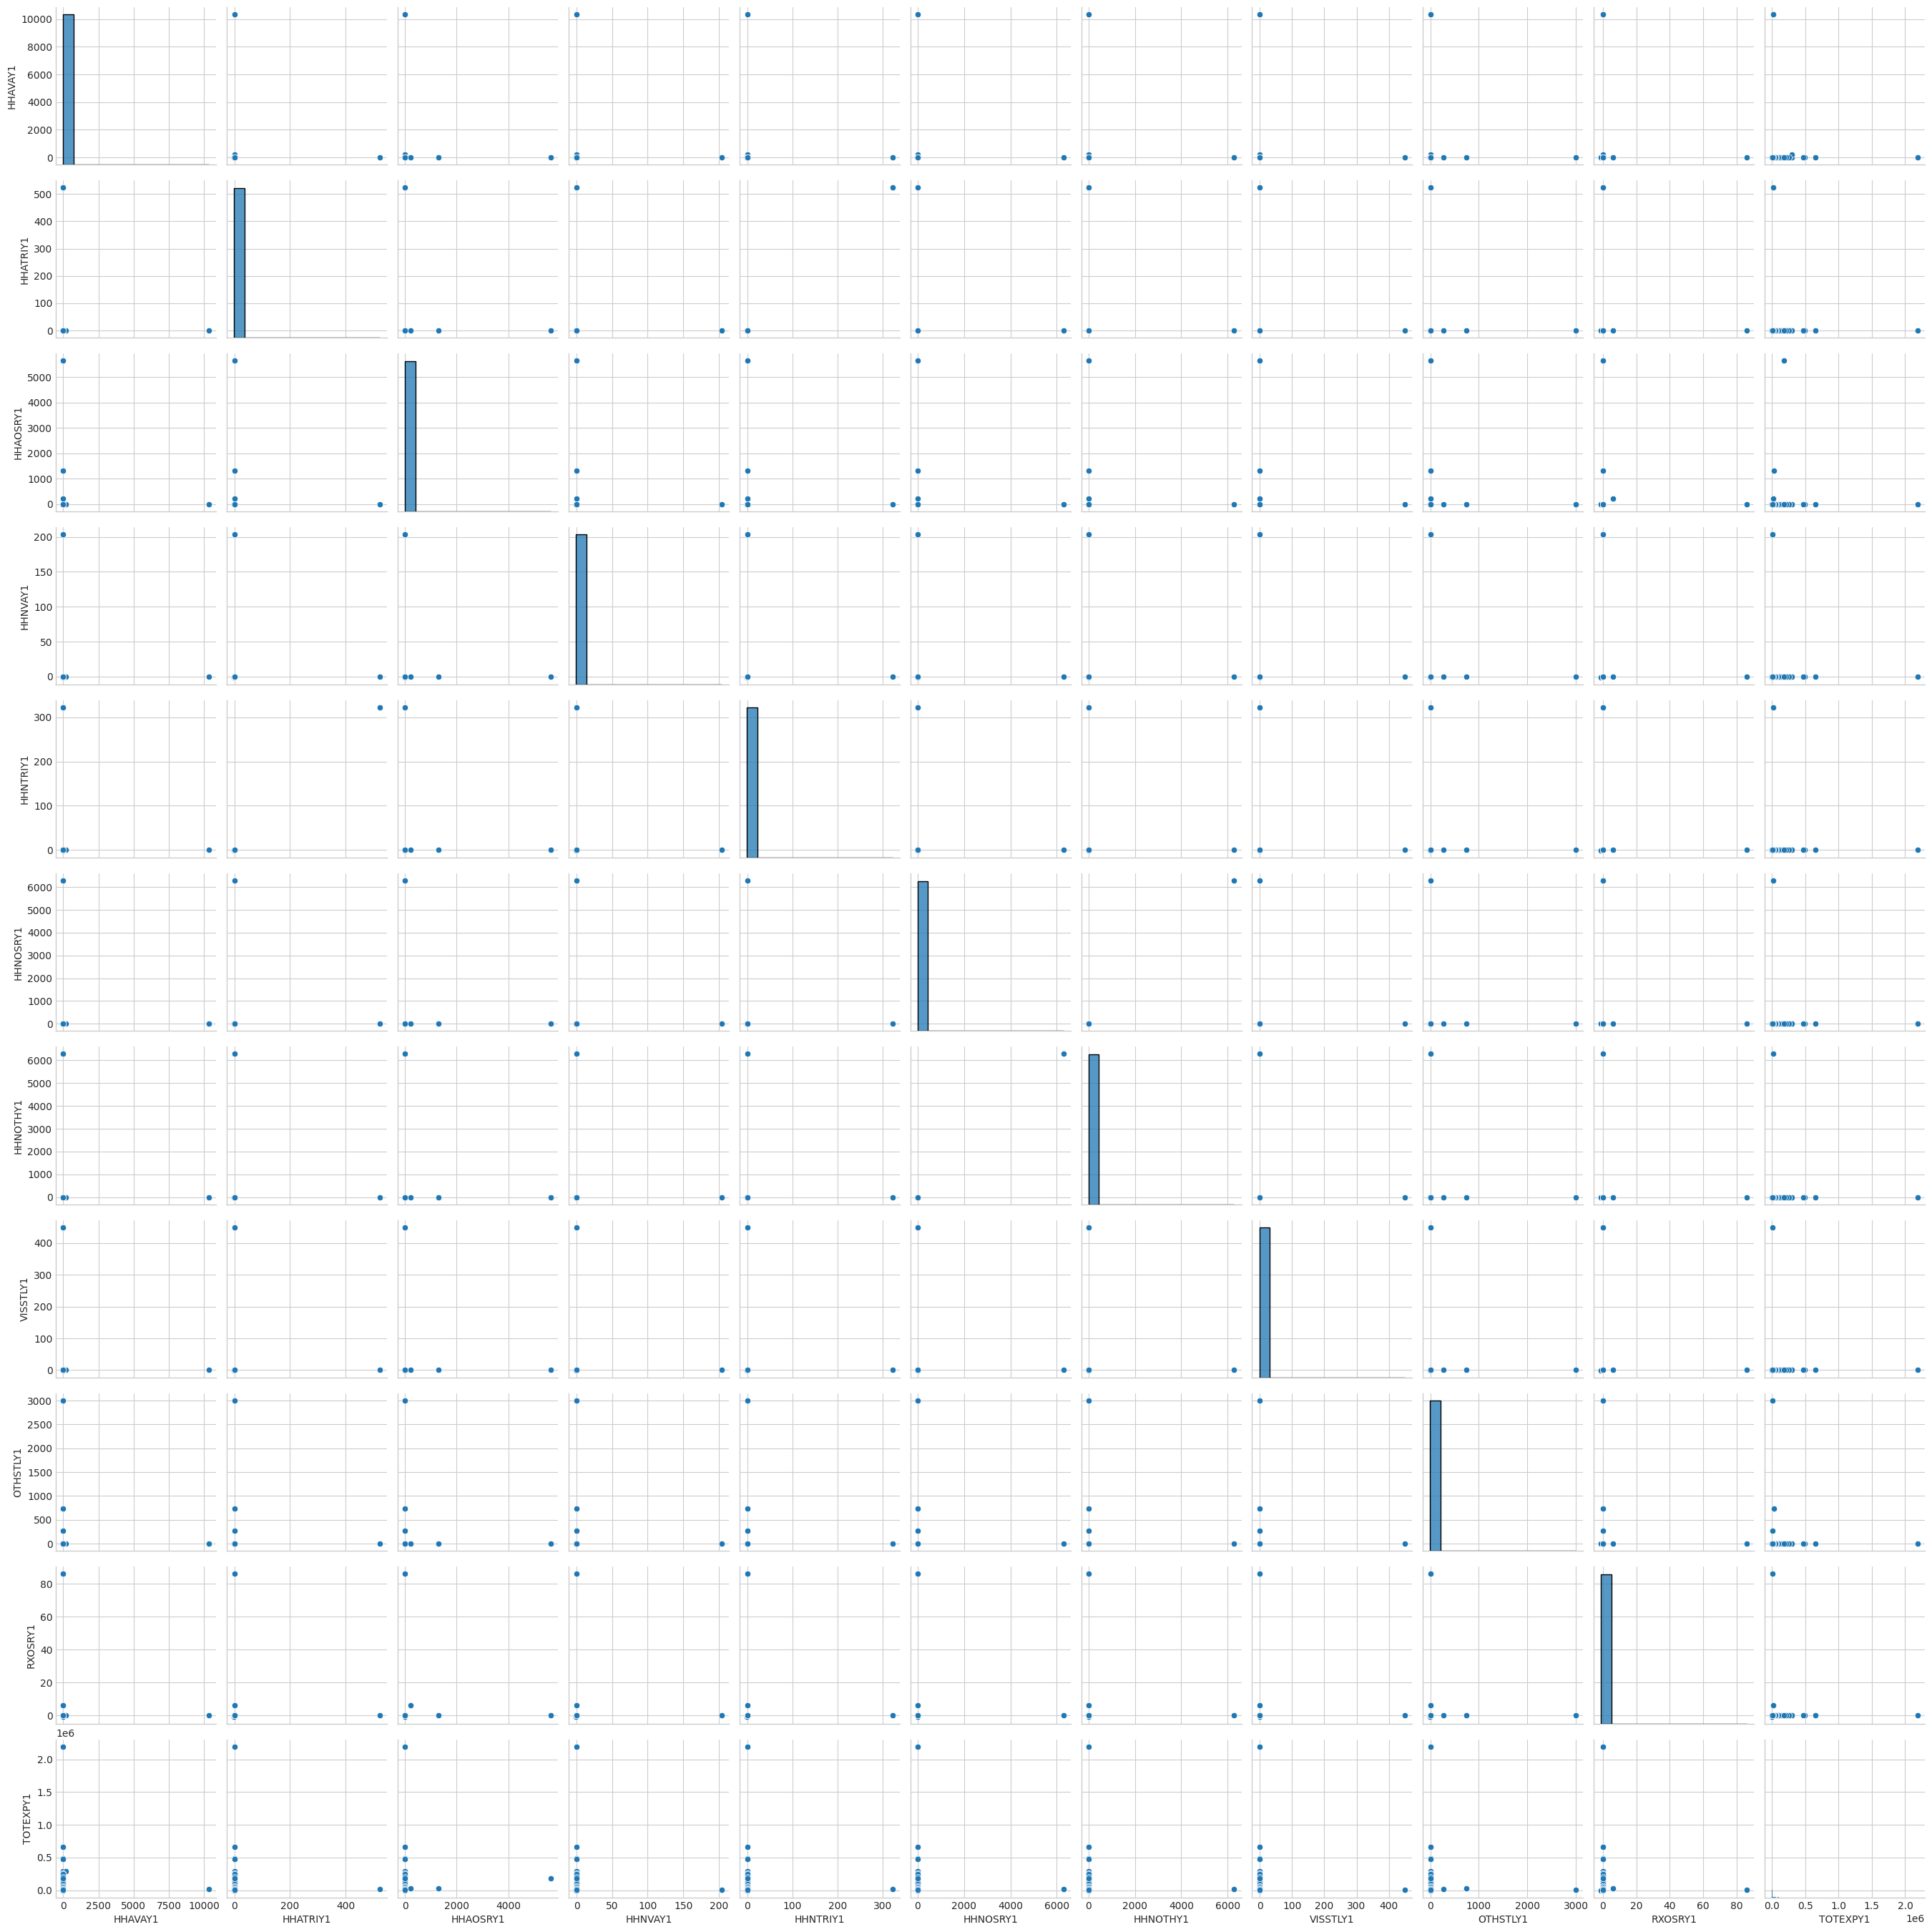

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Create a pair plot using Seaborn
sns.pairplot(des1_meps_top_20b)

# Step 2: Display the plot
plt.show()

           HHAVAY1  HHATRIY1  HHAOSRY1   HHNVAY1  HHNTRIY1  HHNOSRY1  \
HHAVAY1   1.000000 -0.000125 -0.000184 -0.000086 -0.000110 -0.000148   
HHATRIY1 -0.000125  1.000000 -0.000146  0.000397  0.999962 -0.000116   
HHAOSRY1 -0.000184 -0.000146  1.000000 -0.000090 -0.000124 -0.000179   
HHNVAY1  -0.000086  0.000397 -0.000090  1.000000  0.000715 -0.000067   
HHNTRIY1 -0.000110  0.999962 -0.000124  0.000715  1.000000 -0.000097   
HHNOSRY1 -0.000148 -0.000116 -0.000179 -0.000067 -0.000097  1.000000   
HHNOTHY1 -0.000148 -0.000116 -0.000179 -0.000067 -0.000097  1.000000   
VISSTLY1 -0.000121  0.000107 -0.000140  0.000480  0.000256 -0.000111   
OTHSTLY1 -0.000191 -0.000138 -0.000230 -0.000057 -0.000105 -0.000185   
RXOSRY1  -0.000009  0.001109  0.002670  0.002952  0.001846  0.000031   
TOTEXPY1  0.004130  0.002486  0.060487  0.000911  0.002675  0.004514   

          HHNOTHY1  VISSTLY1  OTHSTLY1   RXOSRY1  TOTEXPY1  
HHAVAY1  -0.000148 -0.000121 -0.000191 -0.000009  0.004130  
HHATRIY1 -0.0

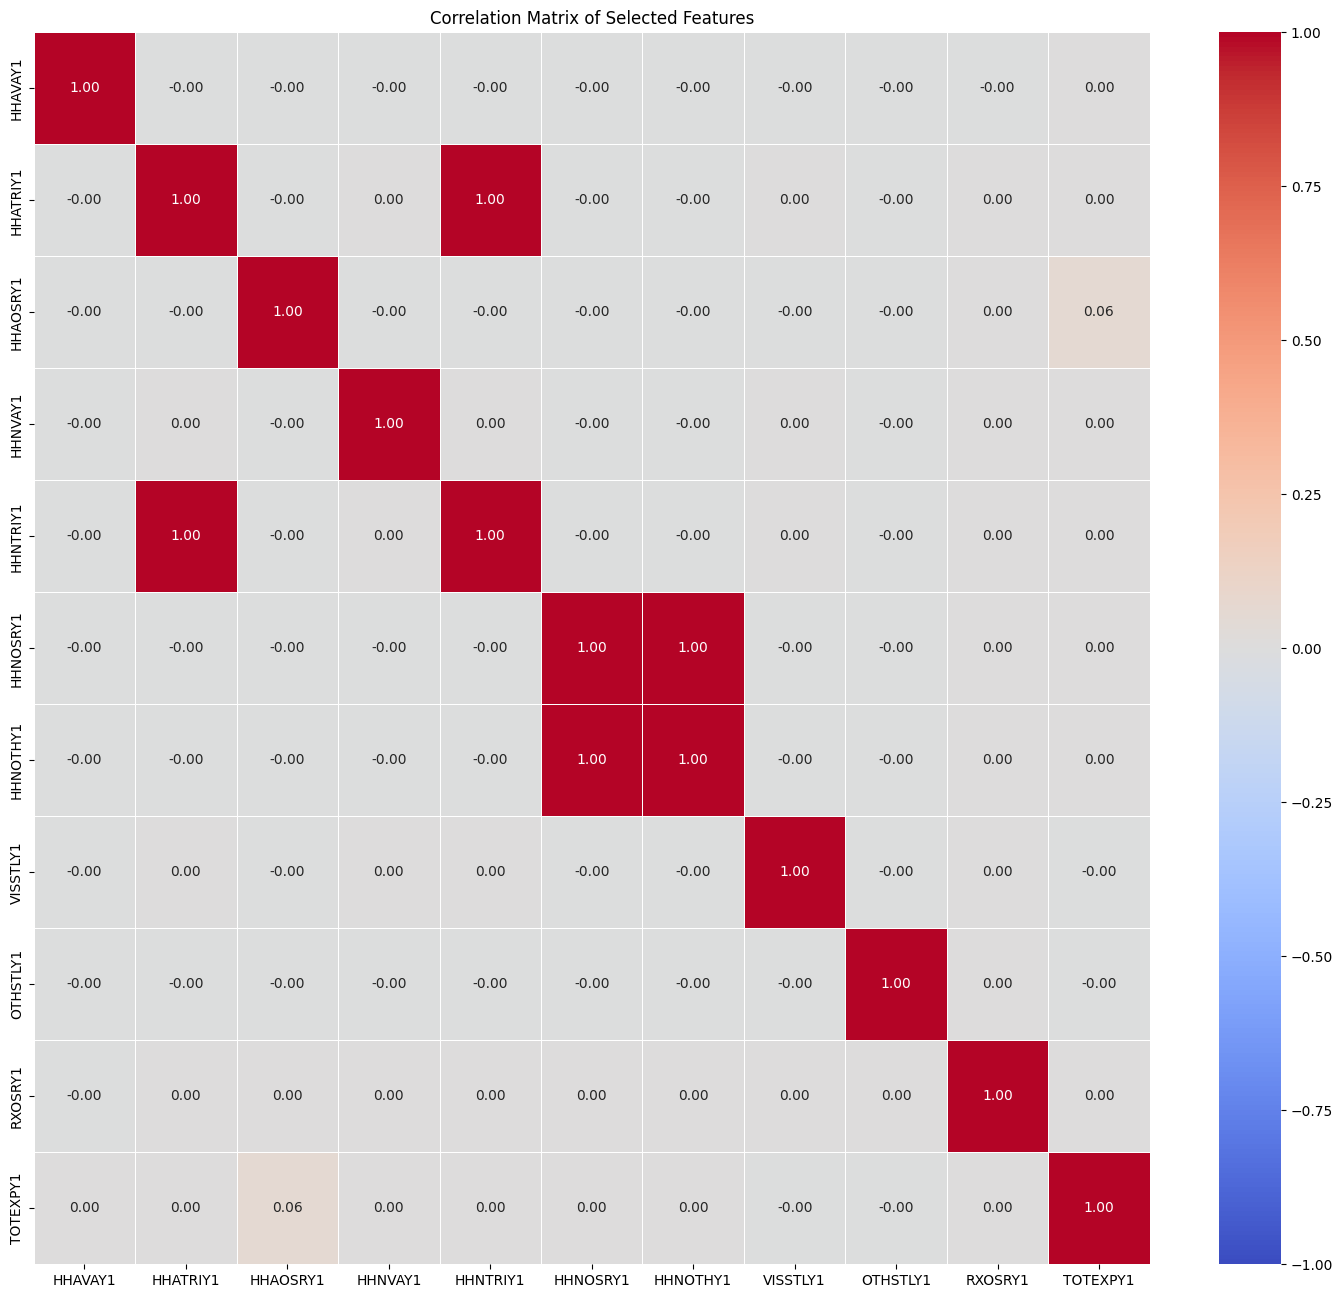

In [15]:
import pandas as pd

# Assume 'df_selected' is the DataFrame containing your selected features

# Step 1: Compute the correlation matrix of the selected features
correlation_matrix = des1_meps_top_20b.corr()

# Step 2: Display the correlation matrix
print(correlation_matrix)

# Optional: If you want to visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 16))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Step 3: Add title and display the heatmap
plt.title("Correlation Matrix of Selected Features")
plt.show()

### The remaining analysis of Dataset1: MEPS HC-244 will be proceed with OptionA dataset. i.e. des1_meps_top_20a

In [16]:
print("Number of duplicate rows in the data set : ", des1_meps_top_20a.duplicated().sum())

Number of duplicate rows in the data set :  2260


In [17]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
duplicates_all_columns = des1_meps_top_20a.duplicated()
# Display rows that are duplicates across all columns
print(des1_meps_top_20a[duplicates_all_columns])

      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
14          2        2        2        1        2        2        2        2   
20          2        2        2        1        2        2        2        2   
21          2        2        2        1        2        2        2        2   
27          2        2        2        1        2        2        2        2   
47          2        2        2        1        2        2        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6731        2        2        2        1        2        2        2        2   
6732        2        2        2        1        2        2        2        2   
6734        2        2        2        1        2        2        2        2   
6736        2        2        2        1        2        2        2        2   
6740        2        2        2        1        2        2        2        2   

      GVBJAY2  PNEMAY2  TOTEXPY1  
14  

In [18]:
# Calculating mean, median, and mode for each column
ds1_mean_values = round(des1_meps_top_20a.mean(), 4)
ds1_median_values = round(des1_meps_top_20a.median(), 4)
ds1_mode_values = round(des1_meps_top_20a.mode().iloc[0], 4)  # `.mode()` returns a DataFrame, so take the first row

In [19]:
# Displaying results
print("Mean of each column:")
print(ds1_mean_values)

Mean of each column:
PNEJAY2        1.9285
PNEFEY2        1.9230
HPOFEY2        1.9181
INSCOP3        1.1038
HPOJAY2        1.9238
GVBFEY2        1.9178
PNEDEY1        1.9312
GVCFEY2        1.9175
GVBJAY2        1.9233
PNEMAY2        1.9214
TOTEXPY1    8612.2756
dtype: float64


In [20]:
print("\nMedian of each column:")
print(ds1_median_values)


Median of each column:
PNEJAY2        2.0
PNEFEY2        2.0
HPOFEY2        2.0
INSCOP3        1.0
HPOJAY2        2.0
GVBFEY2        2.0
PNEDEY1        2.0
GVCFEY2        2.0
GVBJAY2        2.0
PNEMAY2        2.0
TOTEXPY1    1973.0
dtype: float64


In [21]:
print("\nMode of each column:")
print(ds1_mode_values)


Mode of each column:
PNEJAY2     2
PNEFEY2     2
HPOFEY2     2
INSCOP3     1
HPOJAY2     2
GVBFEY2     2
PNEDEY1     2
GVCFEY2     2
GVBJAY2     2
PNEMAY2     2
TOTEXPY1    0
Name: 0, dtype: int64


In [22]:
# Check for negative values in columns where they shouldn't be (acidity, sugar, chlorides, etc.)
negative_values = des1_meps_top_20a[des1_meps_top_20a < 0].dropna(how="all")  # Filters rows with negative values in any column
print("Rows with negative values:")
print(negative_values)

Rows with negative values:
      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
52        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
62       -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
63       -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
86       -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
118      -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6537     -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
6600     -1.0     -1.0     -1.0      NaN     -1.0     -1.0      NaN     -1.0   
6608      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6609     -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   
6706     -1.0     -1.0     -1.0      NaN     -1.0     -1.0     -1.0     -1.0   

      GVBJAY

In [23]:
# Check for extreme outliers in numeric columns
# You can use the interquartile range (IQR) method to find outliers
Q1 = des1_meps_top_20a.quantile(0.25)
Q3 = des1_meps_top_20a.quantile(0.75)
IQR = Q3 - Q1
outliers = ((des1_meps_top_20a < (Q1 - 1.5 * IQR)) | (des1_meps_top_20a > (Q3 + 1.5 * IQR)))

# Display rows that contain outliers
outlier_rows = des1_meps_top_20a[outliers.any(axis=1)]
print("\nRows with outliers:")
print(outlier_rows)


Rows with outliers:
      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
28          2        2        2        1        2        2        2        2   
30          2        2        2        1        2        2        2        2   
52          2        2        2        2        2        2        2        2   
57          2        2        2        1        2        2        2        2   
59          2        2        2        1        2        1        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6711        2        2        2        1        2        2        2        2   
6720        2        2        2        1        2        2        2        2   
6733        2        2        2        1        2        2        2        2   
6738        2        2        2        1        2        2        2        2   
6739        2        2        2        1        2        2        2        2   

      GVBJAY2  PNE

In [24]:
# Function to calculate outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(column[(column < lower_bound) | (column > upper_bound)])

# Counting outliers for each column
outliers_count = {col: count_outliers(des1_meps_top_20a[col]) for col in des1_meps_top_20a.columns}

# Display outliers count
print(outliers_count)

{'PNEJAY2': 166, 'PNEFEY2': 179, 'HPOFEY2': 212, 'INSCOP3': 189, 'HPOJAY2': 198, 'GVBFEY2': 214, 'PNEDEY1': 160, 'GVCFEY2': 216, 'GVBJAY2': 201, 'PNEMAY2': 182, 'TOTEXPY1': 814}


/tmp/ipykernel_1599/2193129335.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([des1_meps_top_20a[col] for col in des1_meps_top_20a.columns], labels=des1_meps_top_20a.columns)


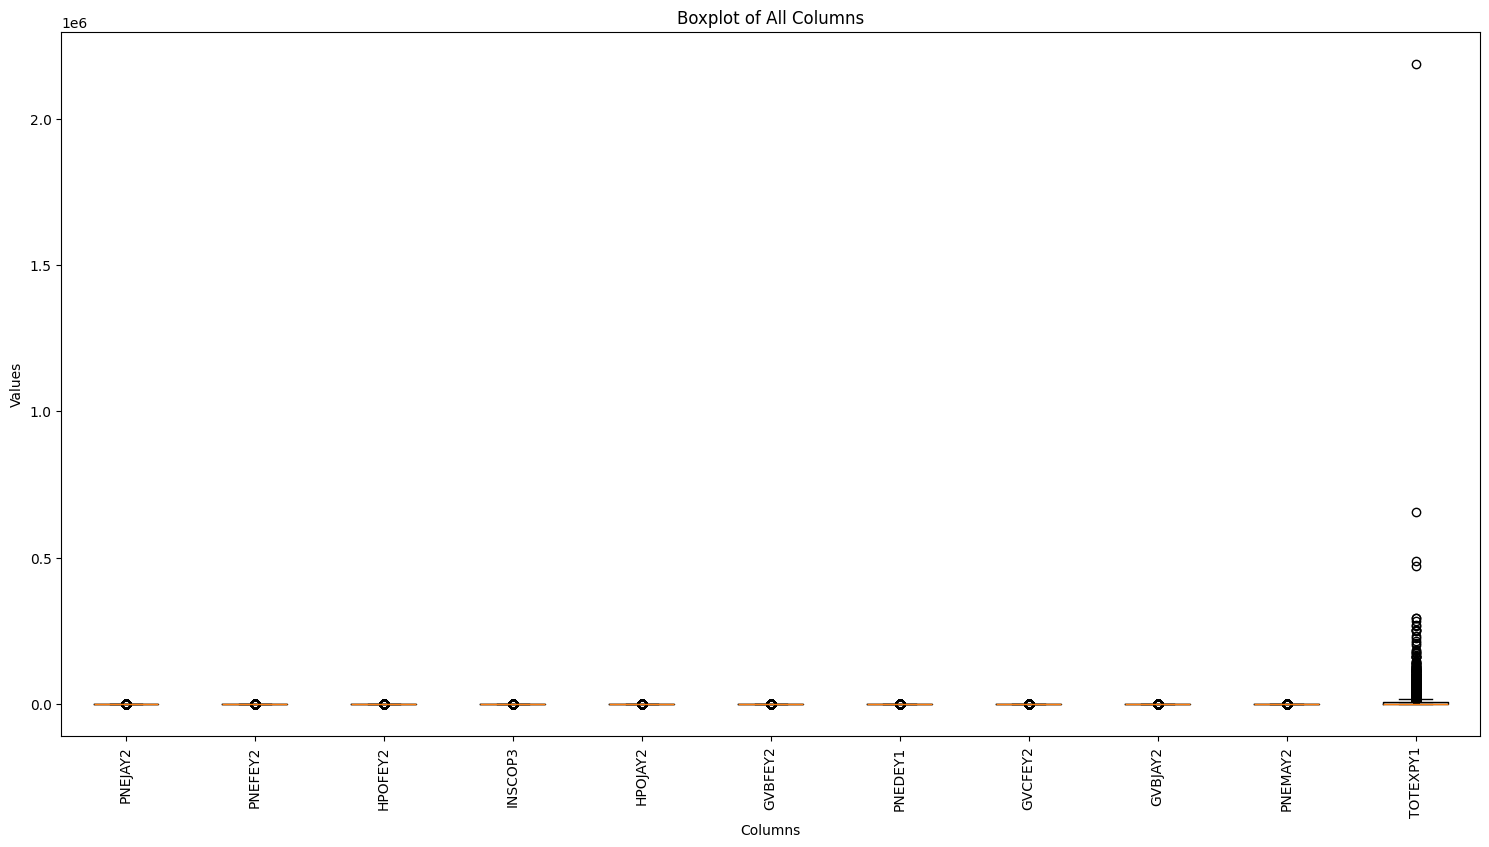

In [25]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure for plotting
plt.figure(figsize=(15, 8))

plt.boxplot([des1_meps_top_20a[col] for col in des1_meps_top_20a.columns], labels=des1_meps_top_20a.columns)

# Add title and labels
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [26]:
# Check for duplicate rows
duplicates = des1_meps_top_20a[des1_meps_top_20a.duplicated()]
print("\nDuplicate rows:")
print(duplicates)


Duplicate rows:
      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
14          2        2        2        1        2        2        2        2   
20          2        2        2        1        2        2        2        2   
21          2        2        2        1        2        2        2        2   
27          2        2        2        1        2        2        2        2   
47          2        2        2        1        2        2        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6731        2        2        2        1        2        2        2        2   
6732        2        2        2        1        2        2        2        2   
6734        2        2        2        1        2        2        2        2   
6736        2        2        2        1        2        2        2        2   
6740        2        2        2        1        2        2        2        2   

      GVBJAY2  PNEMAY2

In [27]:
# Function to calculate outliers
def remove_outliers(des1_meps_top_20a):
    # Iterate through each column to remove outliers
    for col in des1_meps_top_20a.columns:
        # Only process numerical columns
        if des1_meps_top_20a[col].dtype != 'object':
            Q1 = des1_meps_top_20a[col].quantile(0.25)
            Q3 = des1_meps_top_20a[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            des1_meps_top_20a = des1_meps_top_20a[(des1_meps_top_20a[col] >= lower_bound) & (des1_meps_top_20a[col] <= upper_bound)]
    return des1_meps_top_20a

# Remove outliers
des1_meps_top_20a_cleaned = remove_outliers(des1_meps_top_20a)

# Display the cleaned DataFrame
print(des1_meps_top_20a_cleaned)

      PNEJAY2  PNEFEY2  HPOFEY2  INSCOP3  HPOJAY2  GVBFEY2  PNEDEY1  GVCFEY2  \
0           2        2        2        1        2        2        2        2   
1           2        2        2        1        2        2        2        2   
2           2        2        2        1        2        2        2        2   
3           2        2        2        1        2        2        2        2   
4           2        2        2        1        2        2        2        2   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6734        2        2        2        1        2        2        2        2   
6735        2        2        2        1        2        2        2        2   
6736        2        2        2        1        2        2        2        2   
6737        2        2        2        1        2        2        2        2   
6740        2        2        2        1        2        2        2        2   

      GVBJAY2  PNEMAY2  TOTEXPY1  
0   

In [28]:
des1_meps_top_20a_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5666 entries, 0 to 6740
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PNEJAY2   5666 non-null   int64
 1   PNEFEY2   5666 non-null   int64
 2   HPOFEY2   5666 non-null   int64
 3   INSCOP3   5666 non-null   int64
 4   HPOJAY2   5666 non-null   int64
 5   GVBFEY2   5666 non-null   int64
 6   PNEDEY1   5666 non-null   int64
 7   GVCFEY2   5666 non-null   int64
 8   GVBJAY2   5666 non-null   int64
 9   PNEMAY2   5666 non-null   int64
 10  TOTEXPY1  5666 non-null   int64
dtypes: int64(11)
memory usage: 531.2 KB


### Since this cleaned data set (des1_meps_top_20a_cleaned) is still having 5000+ records, then I am going to get a sample of 1200 records

In [39]:
# Randomly sample 1,000 records (18% of 5,666)
des1_meps_top_20a_cleaned_sample = des1_meps_top_20a_cleaned.sample(n=1000, random_state=42)  # Set seed for reproducibility

In [41]:
des1_meps_top_20a_cleaned_sample.describe()

,PNEJAY2,PNEFEY2,HPOFEY2,INSCOP3,HPOJAY2,GVBFEY2,PNEDEY1,GVCFEY2,GVBJAY2,PNEMAY2,TOTEXPY1
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2995.263000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3710.517593
min,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.000000
25%,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,353.750000
50%,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1454.500000
75%,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4219.750000
max,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,15800.000000


In [43]:
# Save to new file
des1_meps_top_20a_cleaned_sample.to_csv("meps_hc244_sample_1000.csv", index=False)

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1599/1547704941.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(des1_meps_top_20a_cleaned_sample[column], color="green", shade=True, ax=axes[4 * i + 2])
/tmp/ipykernel_1599/1547704941.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(des1_meps_top_20a_cleaned_sample[column], color="green", shade=True, ax=axes[4 * i + 2])
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

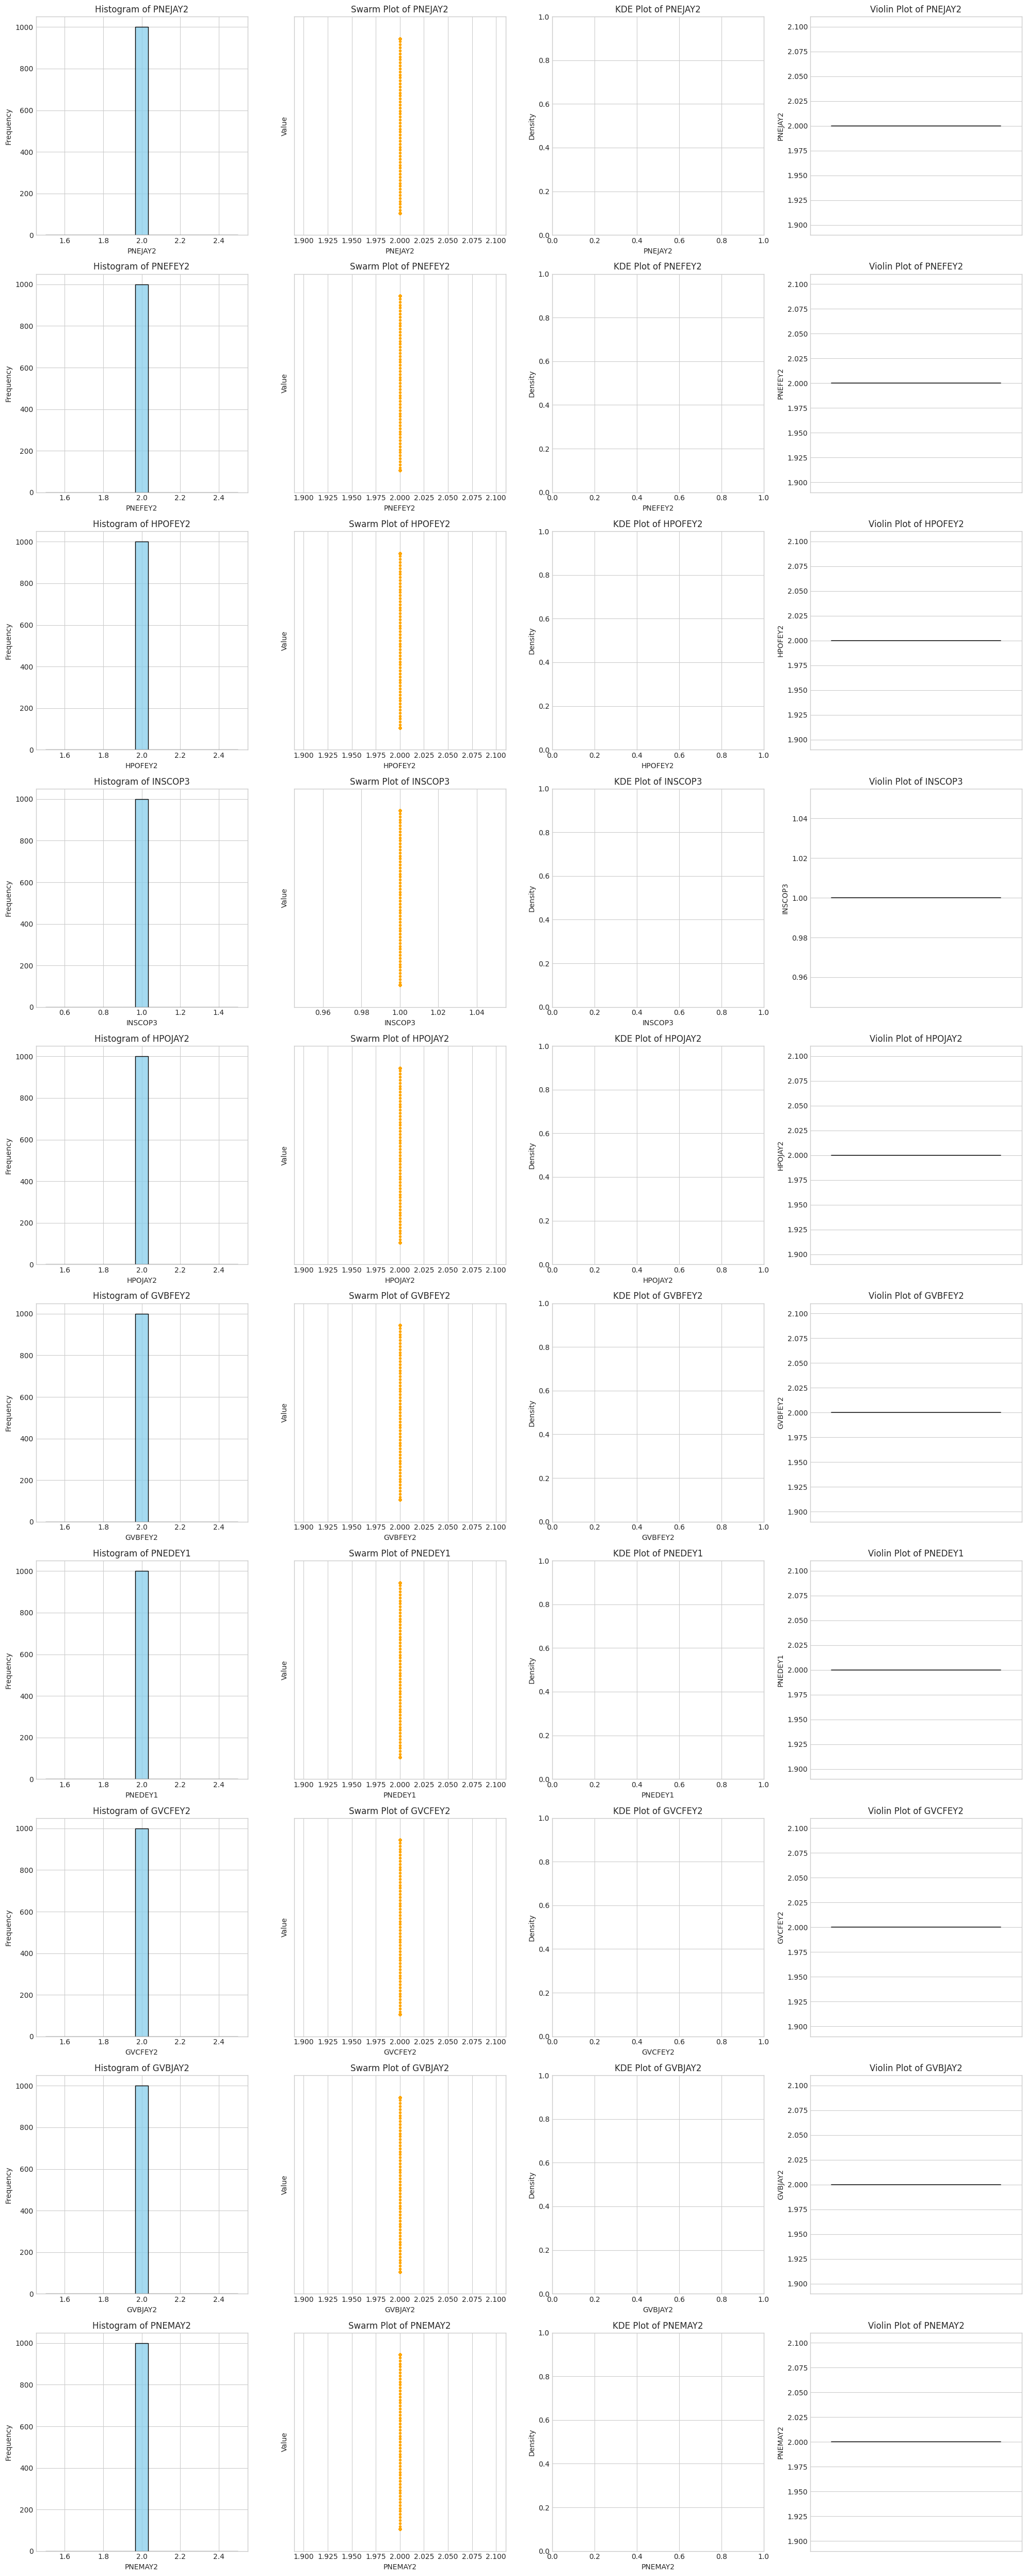

In [42]:
# The followong code would devlop the 4 graphs (Histogram, Swarm Plot, KDE Plot & Violin Plot) in row for each Feature/ Column in a grid.
# This grid view could help to analyze the data distribution of each Feature/ Column

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')

# Create a grid for all features (12 features × 4 plots per feature = 48 subplots)
num_features = len(des1_meps_top_20a_cleaned_sample.columns[:-1])  # Exclude 'target'
fig, axes = plt.subplots(num_features, 4, figsize=(20, 5 * num_features))  # 12 rows, 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column (excluding the target column)
for i, column in enumerate(des1_meps_top_20a_cleaned_sample.columns[:-1]):  # Exclude 'target'
    # Histogram
    sns.histplot(des1_meps_top_20a_cleaned_sample[column], bins=15, color="skyblue", edgecolor="black", ax=axes[4 * i])
    axes[4 * i].set_title(f"Histogram of {column}", fontsize=12)
    axes[4 * i].set_xlabel(column, fontsize=10)
    axes[4 * i].set_ylabel("Frequency", fontsize=10)  
    
    # Swarm Plot
    sns.swarmplot(x=des1_meps_top_20a_cleaned_sample[column], color="orange", size=4, ax=axes[4 * i + 1])
    axes[4 * i + 1].set_title(f"Swarm Plot of {column}", fontsize=12)
    axes[4 * i + 1].set_xlabel(column, fontsize=10)
    axes[4 * i + 1].set_ylabel("Value", fontsize=10)
    
    # KDE Plot
    sns.kdeplot(des1_meps_top_20a_cleaned_sample[column], color="green", shade=True, ax=axes[4 * i + 2])
    axes[4 * i + 2].set_title(f"KDE Plot of {column}", fontsize=12)
    axes[4 * i + 2].set_xlabel(column, fontsize=10)
    axes[4 * i + 2].set_ylabel("Density", fontsize=10)
    
    # Violin Plot
    sns.violinplot(y=des1_meps_top_20a_cleaned_sample[column], color="purple", inner="quartile", ax=axes[4 * i + 3])
    axes[4 * i + 3].set_title(f"Violin Plot of {column}", fontsize=12)
    axes[4 * i + 3].set_ylabel(column, fontsize=10)

# Hide any unused subplots
for j in range(len(des1_meps_top_20a_cleaned_sample.columns[:-1]) * 4, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define a New Dataset, since I could not found good way to represent. I keep the target as INSCOVY1 
selected_features3 = ['AGELSTY1', 'DOBYY', 'SEX', 'MARRYY1X', 'SPOUINY1', 'BORNUSA',
       'YRSINUS', 'HIBPAGY1', 'HIBPDXY1', 'CHDAGY1', 'CHDDXY1', 'ANGIDXY1', 'ANGIAGY1', 
       'MIDXY1', 'MIAGY1', 'CHOLDXY1', 'CHOLAGY1', 'DIABDXY1_M18', 'DIABAGY1','INSCOVY1'
]

# Step 1: Select the relevant columns from the original DataFrame
des1_meps_new = df1[selected_features3]

# Step 2: Display the first few rows of the new DataFrame
des1_meps_new.head(10)

,AGELSTY1,DOBYY,SEX,MARRYY1X,SPOUINY1,BORNUSA,YRSINUS,HIBPAGY1,HIBPDXY1,CHDAGY1,CHDDXY1,ANGIDXY1,ANGIAGY1,MIDXY1,MIAGY1,CHOLDXY1,CHOLAGY1,DIABDXY1_M18,DIABAGY1,INSCOVY1
0,65,1956,2,1,2,2,3,59,1,59,1,2,-1,2,-1,2,-1,2,-1,1
1,24,1997,1,5,2,2,2,-1,2,-1,2,2,-1,2,-1,2,-1,2,-1,1
2,62,1959,1,1,1,1,-1,40,1,-1,2,2,-1,2,-1,1,45,2,-1,1
3,67,1954,1,3,2,1,-1,-1,2,-1,2,2,-1,2,-1,1,64,2,-1,2
4,62,1959,2,3,2,1,-1,58,1,-1,2,2,-1,2,-1,1,50,1,47,1
5,79,1942,2,1,1,1,-1,-1,2,-1,2,2,-1,2,-1,2,-1,2,-1,2
6,80,1941,1,1,1,1,-1,40,1,-1,2,2,-1,2,-1,1,40,2,-1,2
7,41,1980,2,5,2,1,-1,39,1,-1,2,2,-1,2,-1,2,-1,2,-1,1
8,55,1966,1,3,2,1,-1,53,1,-1,2,2,-1,2,-1,2,-1,2,-1,1
9,70,1951,1,1,1,1,-1,-1,2,-1,2,2,-1,2,-1,2,-1,2,-1,1


In [50]:
des1_meps_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGELSTY1      6741 non-null   int64
 1   DOBYY         6741 non-null   int64
 2   SEX           6741 non-null   int64
 3   MARRYY1X      6741 non-null   int64
 4   SPOUINY1      6741 non-null   int64
 5   BORNUSA       6741 non-null   int64
 6   YRSINUS       6741 non-null   int64
 7   HIBPAGY1      6741 non-null   int64
 8   HIBPDXY1      6741 non-null   int64
 9   CHDAGY1       6741 non-null   int64
 10  CHDDXY1       6741 non-null   int64
 11  ANGIDXY1      6741 non-null   int64
 12  ANGIAGY1      6741 non-null   int64
 13  MIDXY1        6741 non-null   int64
 14  MIAGY1        6741 non-null   int64
 15  CHOLDXY1      6741 non-null   int64
 16  CHOLAGY1      6741 non-null   int64
 17  DIABDXY1_M18  6741 non-null   int64
 18  DIABAGY1      6741 non-null   int64
 19  INSCOVY1      6741 non-null

In [51]:
des1_meps_new.describe()

,AGELSTY1,DOBYY,SEX,MARRYY1X,SPOUINY1,BORNUSA,YRSINUS,HIBPAGY1,HIBPDXY1,CHDAGY1,CHDDXY1,ANGIDXY1,ANGIAGY1,MIDXY1,MIAGY1,CHOLDXY1,CHOLAGY1,DIABDXY1_M18,DIABAGY1,INSCOVY1
count,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000,6741.00000,6741.000000,6741.000000,6741.000000,6741.000000,6741.000000
mean,44.338525,1976.612817,1.526331,3.090639,1.753894,1.121940,-0.280671,13.119567,1.109924,1.773772,1.364634,1.401276,-0.045097,1.384068,1.00089,1.121792,12.963952,1.849132,4.385551,1.437027
std,24.183490,24.098997,0.499343,2.039216,0.793960,0.473914,1.956006,23.702420,1.136105,12.752285,1.204697,1.197150,7.474093,1.190008,10.88727,1.163299,23.980204,0.479176,16.548172,0.644138
min,-1.000000,1936.000000,1.000000,-7.000000,-15.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-8.000000,-8.000000,-8.000000,-8.000000,-1.000000
25%,24.000000,1956.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,2.000000,2.000000,-1.000000,2.000000,-1.00000,1.000000,-1.000000,2.000000,-1.000000,1.000000
50%,47.000000,1974.000000,2.000000,3.000000,2.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,2.000000,2.000000,-1.000000,2.000000,-1.00000,2.000000,-1.000000,2.000000,-1.000000,1.000000
75%,65.000000,1997.000000,2.000000,5.000000,2.000000,1.000000,-1.000000,30.000000,2.000000,-1.000000,2.000000,2.000000,-1.000000,2.000000,-1.00000,2.000000,30.000000,2.000000,-1.000000,2.000000
max,85.000000,2022.000000,2.000000,6.000000,3.000000,2.000000,5.000000,85.000000,2.000000,85.000000,2.000000,2.000000,81.000000,2.000000,85.00000,2.000000,85.000000,2.000000,85.000000,3.000000


In [53]:
# Are there any duplicate rows?
# first check any duplicate rows in the data set 
print("Number of duplicate rows in the data set : ", des1_meps_new.duplicated().sum())

Number of duplicate rows in the data set :  2631


In [55]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
duplicates_all_columns = des1_meps_new.duplicated()

# Display rows that are duplicates across all columns
print(des1_meps_new[duplicates_all_columns])

      AGELSTY1  DOBYY  SEX  MARRYY1X  SPOUINY1  BORNUSA  YRSINUS  HIBPAGY1  \
45          15   2006    2         6         3        1       -1        -1   
48          15   2006    2         6         3        1       -1        -1   
173         12   2009    2         6         3        1       -1        -1   
190         13   2008    1         6         3        1       -1        -1   
197         29   1992    2         5         2        1       -1        -1   
...        ...    ...  ...       ...       ...      ...      ...       ...   
6726        22   1999    2         5         2        1       -1        -1   
6732        27   1994    1         5         2        1       -1        -1   
6735        54   1967    2         1         1        2        5        -1   
6736        14   2007    1         6         3        1       -1        -1   
6737        21   2000    1         5         2        1       -1        -1   

      HIBPDXY1  CHDAGY1  CHDDXY1  ANGIDXY1  ANGIAGY1  MIDXY1  M

In [57]:
# Remove duplicates based on all columns
des1_meps_new_ndup = des1_meps_new.drop_duplicates()

# If you want to reset the index after dropping duplicates
des1_meps_new_ndup.reset_index(drop=True, inplace=True)

# Check the result
des1_meps_new_ndup.head(15)

,AGELSTY1,DOBYY,SEX,MARRYY1X,SPOUINY1,BORNUSA,YRSINUS,HIBPAGY1,HIBPDXY1,CHDAGY1,CHDDXY1,ANGIDXY1,ANGIAGY1,MIDXY1,MIAGY1,CHOLDXY1,CHOLAGY1,DIABDXY1_M18,DIABAGY1,INSCOVY1
0,65,1956,2,1,2,2,3,59,1,59,1,2,-1,2,-1,2,-1,2,-1,1
1,24,1997,1,5,2,2,2,-1,2,-1,2,2,-1,2,-1,2,-1,2,-1,1
2,62,1959,1,1,1,1,-1,40,1,-1,2,2,-1,2,-1,1,45,2,-1,1
3,67,1954,1,3,2,1,-1,-1,2,-1,2,2,-1,2,-1,1,64,2,-1,2
4,62,1959,2,3,2,1,-1,58,1,-1,2,2,-1,2,-1,1,50,1,47,1
5,79,1942,2,1,1,1,-1,-1,2,-1,2,2,-1,2,-1,2,-1,2,-1,2
6,80,1941,1,1,1,1,-1,40,1,-1,2,2,-1,2,-1,1,40,2,-1,2
7,41,1980,2,5,2,1,-1,39,1,-1,2,2,-1,2,-1,2,-1,2,-1,1
8,55,1966,1,3,2,1,-1,53,1,-1,2,2,-1,2,-1,2,-1,2,-1,1
9,70,1951,1,1,1,1,-1,-1,2,-1,2,2,-1,2,-1,2,-1,2,-1,1


In [58]:
des1_meps_new_ndup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGELSTY1      4110 non-null   int64
 1   DOBYY         4110 non-null   int64
 2   SEX           4110 non-null   int64
 3   MARRYY1X      4110 non-null   int64
 4   SPOUINY1      4110 non-null   int64
 5   BORNUSA       4110 non-null   int64
 6   YRSINUS       4110 non-null   int64
 7   HIBPAGY1      4110 non-null   int64
 8   HIBPDXY1      4110 non-null   int64
 9   CHDAGY1       4110 non-null   int64
 10  CHDDXY1       4110 non-null   int64
 11  ANGIDXY1      4110 non-null   int64
 12  ANGIAGY1      4110 non-null   int64
 13  MIDXY1        4110 non-null   int64
 14  MIAGY1        4110 non-null   int64
 15  CHOLDXY1      4110 non-null   int64
 16  CHOLAGY1      4110 non-null   int64
 17  DIABDXY1_M18  4110 non-null   int64
 18  DIABAGY1      4110 non-null   int64
 19  INSCOVY1      4110 non-null

In [59]:
des1_meps_new_ndup.describe()

,AGELSTY1,DOBYY,SEX,MARRYY1X,SPOUINY1,BORNUSA,YRSINUS,HIBPAGY1,HIBPDXY1,CHDAGY1,CHDDXY1,ANGIDXY1,ANGIAGY1,MIDXY1,MIAGY1,CHOLDXY1,CHOLAGY1,DIABDXY1_M18,DIABAGY1,INSCOVY1
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,56.043796,1964.879805,1.539173,2.458394,1.568613,1.173966,0.026034,21.900487,1.364477,3.549392,1.776886,1.836983,0.566180,1.808759,2.281752,1.384185,21.625791,1.783942,7.833090,1.535523
std,18.860248,18.647233,0.498524,1.671369,0.668840,0.577550,2.276367,26.643589,0.741630,16.083134,0.731784,0.674390,9.522239,0.671661,13.792201,0.801613,27.124406,0.522583,20.462738,0.655641
min,-1.000000,1936.000000,1.000000,-7.000000,-15.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-1.000000
25%,43.000000,1950.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,2.000000,2.000000,-1.000000,2.000000,-1.000000,1.000000,-1.000000,2.000000,-1.000000,1.000000
50%,59.000000,1961.000000,2.000000,2.000000,2.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,2.000000,2.000000,-1.000000,2.000000,-1.000000,1.000000,-1.000000,2.000000,-1.000000,1.000000
75%,71.000000,1978.000000,2.000000,4.000000,2.000000,1.000000,-1.000000,49.000000,2.000000,-1.000000,2.000000,2.000000,-1.000000,2.000000,-1.000000,2.000000,50.000000,2.000000,-1.000000,2.000000
max,85.000000,2022.000000,2.000000,6.000000,3.000000,2.000000,5.000000,85.000000,2.000000,85.000000,2.000000,2.000000,81.000000,2.000000,85.000000,2.000000,85.000000,2.000000,85.000000,3.000000


In [60]:
# first check any duplicate rows in the data set 
print("Number of duplicate rows in the data set : ", des1_meps_new_ndup.duplicated().sum())

Number of duplicate rows in the data set :  0


In [62]:
# Identifying all rows that have any duplicate values in a particular column: For example, to find all rows where the column target has duplicates:

duplicates_target = des1_meps_new_ndup[des1_meps_new_ndup['INSCOVY1'].duplicated(keep=False)]
print(duplicates_target)

      AGELSTY1  DOBYY  SEX  MARRYY1X  SPOUINY1  BORNUSA  YRSINUS  HIBPAGY1  \
0           65   1956    2         1         2        2        3        59   
1           24   1997    1         5         2        2        2        -1   
2           62   1959    1         1         1        1       -1        40   
3           67   1954    1         3         2        1       -1        -1   
4           62   1959    2         3         2        1       -1        58   
...        ...    ...  ...       ...       ...      ...      ...       ...   
4105        80   1941    2         2         2        2        5        77   
4106        54   1967    1         1         1        2        5        -1   
4107        73   1948    1         3         2        1       -1        -1   
4108        83   1938    1         1         1        1       -1        65   
4109        82   1939    2         1         1        1       -1        65   

      HIBPDXY1  CHDAGY1  CHDDXY1  ANGIDXY1  ANGIAGY1  MIDXY1  M

In [63]:
# Calculating mean, median, and mode for each column
des1_new_mean_values = round(des1_meps_new_ndup.mean(), 4)
des1_new_median_values = round(des1_meps_new_ndup.median(), 4)
des1_new_mode_values = round(des1_meps_new_ndup.mode().iloc[0], 4)  # `.mode()` returns a DataFrame, so take the first row

# Displaying results
print("Mean of each column:")
print(des1_new_mean_values)

Mean of each column:
AGELSTY1          56.0438
DOBYY           1964.8798
SEX                1.5392
MARRYY1X           2.4584
SPOUINY1           1.5686
BORNUSA            1.1740
YRSINUS            0.0260
HIBPAGY1          21.9005
HIBPDXY1           1.3645
CHDAGY1            3.5494
CHDDXY1            1.7769
ANGIDXY1           1.8370
ANGIAGY1           0.5662
MIDXY1             1.8088
MIAGY1             2.2818
CHOLDXY1           1.3842
CHOLAGY1          21.6258
DIABDXY1_M18       1.7839
DIABAGY1           7.8331
INSCOVY1           1.5355
dtype: float64


In [64]:
print("\nMedian of each column:")
print(des1_new_median_values)



Median of each column:
AGELSTY1          59.0
DOBYY           1961.0
SEX                2.0
MARRYY1X           2.0
SPOUINY1           2.0
BORNUSA            1.0
YRSINUS           -1.0
HIBPAGY1          -1.0
HIBPDXY1           1.0
CHDAGY1           -1.0
CHDDXY1            2.0
ANGIDXY1           2.0
ANGIAGY1          -1.0
MIDXY1             2.0
MIAGY1            -1.0
CHOLDXY1           1.0
CHOLAGY1          -1.0
DIABDXY1_M18       2.0
DIABAGY1          -1.0
INSCOVY1           1.0
dtype: float64


In [65]:
print("\nMode of each column:")
print(des1_new_mode_values)


Mode of each column:
AGELSTY1          85
DOBYY           1937
SEX                2
MARRYY1X           1
SPOUINY1           2
BORNUSA            1
YRSINUS           -1
HIBPAGY1          -1
HIBPDXY1           1
CHDAGY1           -1
CHDDXY1            2
ANGIDXY1           2
ANGIAGY1          -1
MIDXY1             2
MIAGY1            -1
CHOLDXY1           2
CHOLAGY1          -1
DIABDXY1_M18       2
DIABAGY1          -1
INSCOVY1           1
Name: 0, dtype: int64


In [66]:
# Check for missing values (NaN)
missing_values = des1_meps_new_ndup.isnull().sum()

# Display the number of missing values per column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
AGELSTY1        0
DOBYY           0
SEX             0
MARRYY1X        0
SPOUINY1        0
BORNUSA         0
YRSINUS         0
HIBPAGY1        0
HIBPDXY1        0
CHDAGY1         0
CHDDXY1         0
ANGIDXY1        0
ANGIAGY1        0
MIDXY1          0
MIAGY1          0
CHOLDXY1        0
CHOLAGY1        0
DIABDXY1_M18    0
DIABAGY1        0
INSCOVY1        0
dtype: int64


In [67]:
# Check for negative values in columns where they shouldn't be (acidity, sugar, chlorides, etc.)
negative_values = des1_meps_new_ndup[des1_meps_new_ndup < 0].dropna(how="all")  # Filters rows with negative values in any column
print("Rows with negative values:")
print(negative_values)

Rows with negative values:
      AGELSTY1  DOBYY  SEX  MARRYY1X  SPOUINY1  BORNUSA  YRSINUS  HIBPAGY1  \
0          NaN    NaN  NaN       NaN       NaN      NaN      NaN       NaN   
1          NaN    NaN  NaN       NaN       NaN      NaN      NaN      -1.0   
2          NaN    NaN  NaN       NaN       NaN      NaN     -1.0       NaN   
3          NaN    NaN  NaN       NaN       NaN      NaN     -1.0      -1.0   
4          NaN    NaN  NaN       NaN       NaN      NaN     -1.0       NaN   
...        ...    ...  ...       ...       ...      ...      ...       ...   
4105       NaN    NaN  NaN       NaN       NaN      NaN      NaN       NaN   
4106       NaN    NaN  NaN       NaN       NaN      NaN      NaN      -1.0   
4107       NaN    NaN  NaN       NaN       NaN      NaN     -1.0      -1.0   
4108       NaN    NaN  NaN       NaN       NaN      NaN     -1.0       NaN   
4109       NaN    NaN  NaN       NaN       NaN      NaN     -1.0       NaN   

      HIBPDXY1  CHDAGY1  CHDDXY1  AN

In [69]:
# Remove rows with any negative values
des1_meps_new_nneg = des1_meps_new_ndup.where(des1_meps_new_ndup >= 0,np.nan)

# Check the updated DataFrame
des1_meps_new_nneg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGELSTY1      4098 non-null   float64
 1   DOBYY         4110 non-null   int64  
 2   SEX           4110 non-null   int64  
 3   MARRYY1X      4096 non-null   float64
 4   SPOUINY1      4096 non-null   float64
 5   BORNUSA       4071 non-null   float64
 6   YRSINUS       815 non-null    float64
 7   HIBPAGY1      1943 non-null   float64
 8   HIBPDXY1      3934 non-null   float64
 9   CHDAGY1       333 non-null    float64
 10  CHDDXY1       3932 non-null   float64
 11  ANGIDXY1      3934 non-null   float64
 12  ANGIAGY1      118 non-null    float64
 13  MIDXY1        3935 non-null   float64
 14  MIAGY1        236 non-null    float64
 15  CHOLDXY1      3930 non-null   float64
 16  CHOLAGY1      1841 non-null   float64
 17  DIABDXY1_M18  4067 non-null   float64
 18  DIABAGY1      713 non-null  

In [70]:
des1_meps_new_nneg.describe()

,AGELSTY1,DOBYY,SEX,MARRYY1X,SPOUINY1,BORNUSA,YRSINUS,HIBPAGY1,HIBPDXY1,CHDAGY1,CHDDXY1,ANGIDXY1,ANGIAGY1,MIDXY1,MIAGY1,CHOLDXY1,CHOLAGY1,DIABDXY1_M18,DIABAGY1,INSCOVY1
count,4098.000000,4110.000000,4110.000000,4096.000000,4096.000000,4071.000000,815.000000,1943.000000,3934.000000,333.000000,3932.000000,3934.000000,118.000000,3935.00000,236.000000,3930.000000,1841.000000,4067.000000,713.000000,4098.000000
mean,56.210835,1964.879805,1.539173,2.473145,1.584229,1.206829,4.387730,47.873392,1.475597,55.465465,1.911495,1.969243,53.728814,1.93723,56.478814,1.505852,49.895709,1.816818,50.230014,1.542948
std,18.633090,18.647233,0.498524,1.650474,0.543345,0.405081,1.011893,14.799916,0.499468,16.045197,0.284063,0.172682,15.763021,0.24258,13.938908,0.500029,13.857190,0.386863,15.378113,0.642058
min,0.000000,1936.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,14.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,44.000000,1950.000000,1.000000,1.000000,1.000000,1.000000,4.000000,38.000000,1.000000,47.000000,2.000000,2.000000,45.000000,2.00000,47.000000,1.000000,40.000000,2.000000,40.000000,1.000000
50%,60.000000,1961.000000,2.000000,2.000000,2.000000,1.000000,5.000000,50.000000,1.000000,58.000000,2.000000,2.000000,55.000000,2.00000,58.000000,2.000000,50.000000,2.000000,51.000000,1.000000
75%,71.000000,1978.000000,2.000000,4.000000,2.000000,1.000000,5.000000,58.000000,2.000000,66.000000,2.000000,2.000000,64.750000,2.00000,66.000000,2.000000,60.000000,2.000000,61.000000,2.000000
max,85.000000,2022.000000,2.000000,6.000000,3.000000,2.000000,5.000000,85.000000,2.000000,85.000000,2.000000,2.000000,81.000000,2.00000,85.000000,2.000000,85.000000,2.000000,85.000000,3.000000


In [71]:
# Check missing value percentages
missing_pct = des1_meps_new_nneg.isnull().sum() / len(des1_meps_new_nneg) * 100
print(missing_pct)

AGELSTY1         0.291971
DOBYY            0.000000
SEX              0.000000
MARRYY1X         0.340633
SPOUINY1         0.340633
BORNUSA          0.948905
YRSINUS         80.170316
HIBPAGY1        52.725061
HIBPDXY1         4.282238
CHDAGY1         91.897810
CHDDXY1          4.330900
ANGIDXY1         4.282238
ANGIAGY1        97.128954
MIDXY1           4.257908
MIAGY1          94.257908
CHOLDXY1         4.379562
CHOLAGY1        55.206813
DIABDXY1_M18     1.046229
DIABAGY1        82.652068
INSCOVY1         0.291971
dtype: float64


In [73]:
# Drop columns with >50% missing values
cols_to_drop = missing_pct[missing_pct > 50].index
des1_meps_nmis = des1_meps_new_nneg.drop(cols_to_drop, axis=1)
des1_meps_nmis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGELSTY1      4098 non-null   float64
 1   DOBYY         4110 non-null   int64  
 2   SEX           4110 non-null   int64  
 3   MARRYY1X      4096 non-null   float64
 4   SPOUINY1      4096 non-null   float64
 5   BORNUSA       4071 non-null   float64
 6   HIBPDXY1      3934 non-null   float64
 7   CHDDXY1       3932 non-null   float64
 8   ANGIDXY1      3934 non-null   float64
 9   MIDXY1        3935 non-null   float64
 10  CHOLDXY1      3930 non-null   float64
 11  DIABDXY1_M18  4067 non-null   float64
 12  INSCOVY1      4098 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 417.6 KB


In [75]:
# Ensure date/age consistency
# If `DOBYY` is year of birth and `AGELSTY1` is age at survey:
des1_meps_nmis['AGE_CALCULATED'] = des1_meps_nmis['DOBYY'].apply(lambda x: 2024 - x)  # Replace 2024 with survey year
des1_meps_agecr = des1_meps_nmis.drop(['DOBYY', 'AGELSTY1'], axis=1)  # Use calculated age instead
des1_meps_agecr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEX             4110 non-null   int64  
 1   MARRYY1X        4096 non-null   float64
 2   SPOUINY1        4096 non-null   float64
 3   BORNUSA         4071 non-null   float64
 4   HIBPDXY1        3934 non-null   float64
 5   CHDDXY1         3932 non-null   float64
 6   ANGIDXY1        3934 non-null   float64
 7   MIDXY1          3935 non-null   float64
 8   CHOLDXY1        3930 non-null   float64
 9   DIABDXY1_M18    4067 non-null   float64
 10  INSCOVY1        4098 non-null   float64
 11  AGE_CALCULATED  4110 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 385.4 KB


In [83]:
des1_meps_agecr.head(15)

,SEX,MARRYY1X,SPOUINY1,BORNUSA,HIBPDXY1,CHDDXY1,ANGIDXY1,MIDXY1,CHOLDXY1,DIABDXY1_M18,INSCOVY1,AGE_CALCULATED
0,2,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,68
1,1,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,27
2,1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,65
3,1,3.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,70
4,2,3.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,65
5,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,82
6,1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,83
7,2,5.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,44
8,1,3.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,58
9,1,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,73


In [81]:
Q1 = des1_meps_agecr.quantile(0.25)
Q3 = des1_meps_agecr.quantile(0.75)
IQR = Q3 - Q1
outliers = ((des1_meps_agecr < (Q1 - 1.5 * IQR)) | (des1_meps_agecr > (Q3 + 1.5 * IQR)))

# Display rows that contain outliers
outlier_rows = des1_meps_agecr[outliers.any(axis=1)]
print("\nRows with outliers:")
print(outlier_rows)


Rows with outliers:
      SEX  MARRYY1X  SPOUINY1  BORNUSA  HIBPDXY1  CHDDXY1  ANGIDXY1  MIDXY1  \
0       2       1.0       2.0      2.0       1.0      1.0       2.0     2.0   
1       1       5.0       2.0      2.0       2.0      2.0       2.0     2.0   
4       2       3.0       2.0      1.0       1.0      2.0       2.0     2.0   
11      2       3.0       2.0      1.0       1.0      2.0       2.0     2.0   
12      2       3.0       2.0      2.0       1.0      2.0       2.0     2.0   
...   ...       ...       ...      ...       ...      ...       ...     ...   
4102    2       3.0       2.0      1.0       1.0      1.0       2.0     2.0   
4105    2       2.0       2.0      2.0       1.0      2.0       2.0     2.0   
4106    1       1.0       1.0      2.0       2.0      2.0       2.0     2.0   
4107    1       3.0       2.0      1.0       2.0      1.0       1.0     1.0   
4108    1       1.0       1.0      1.0       1.0      1.0       2.0     1.0   

      CHOLDXY1  DIABDXY1_M18  

<Figure size 1500x1000 with 0 Axes>

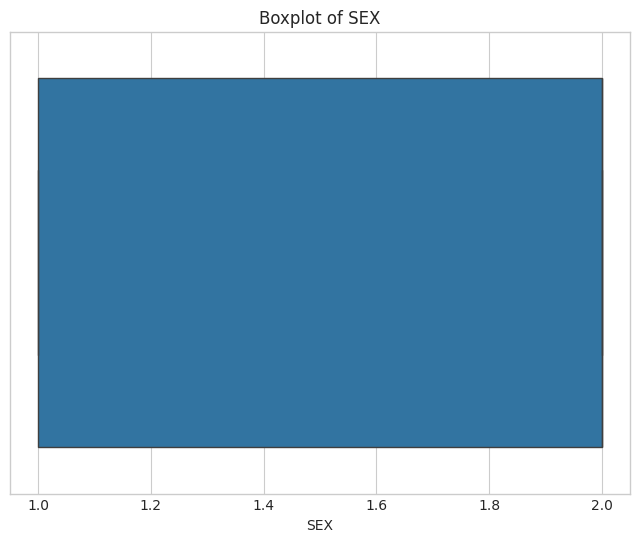

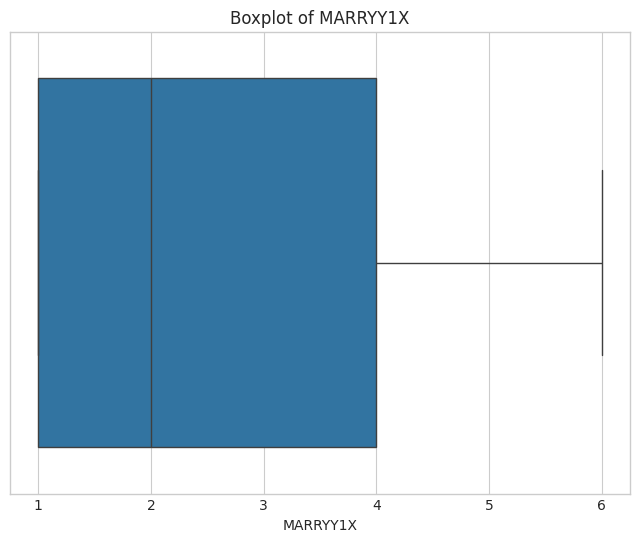

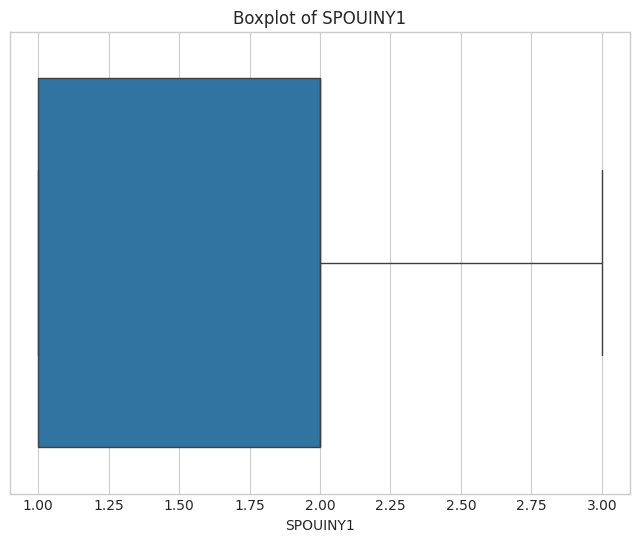

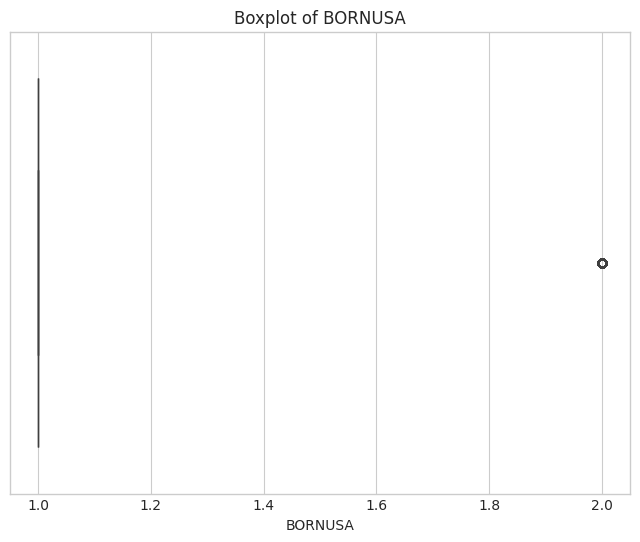

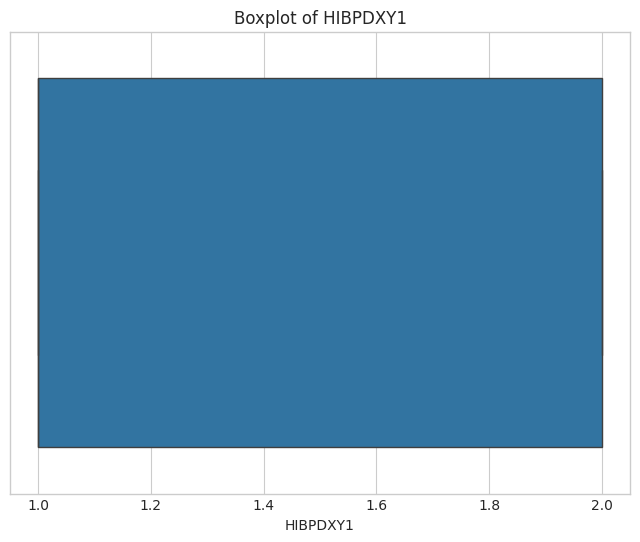

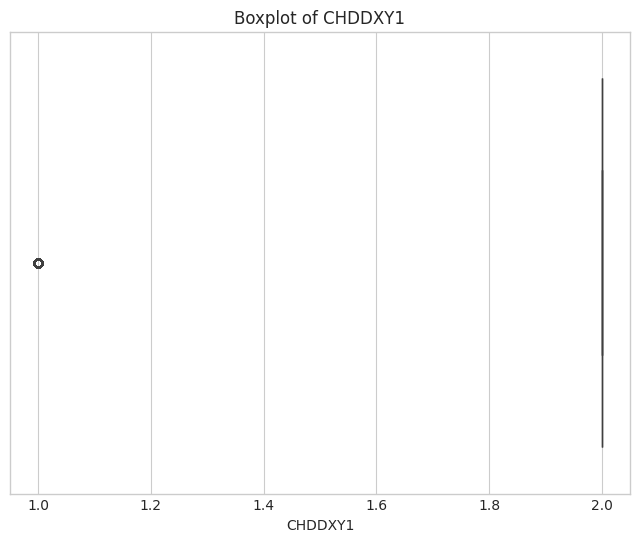

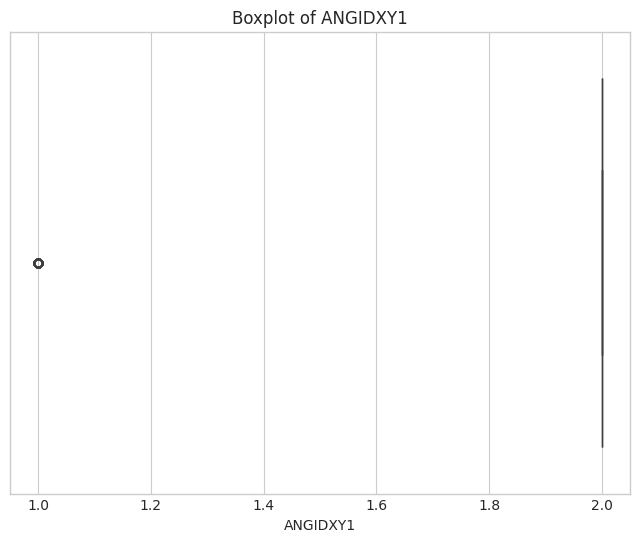

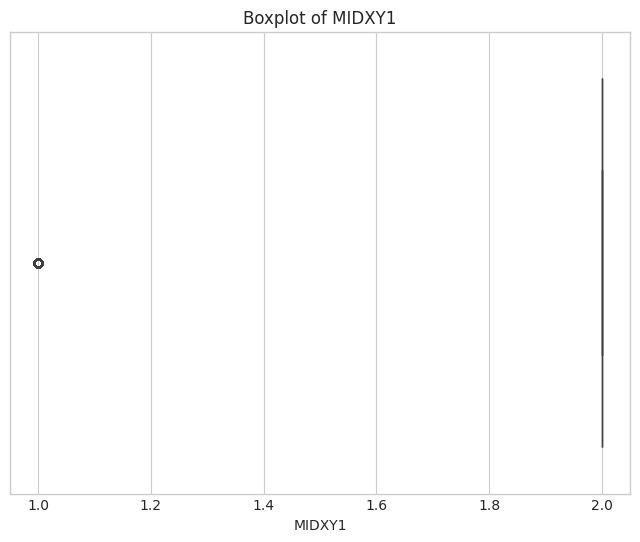

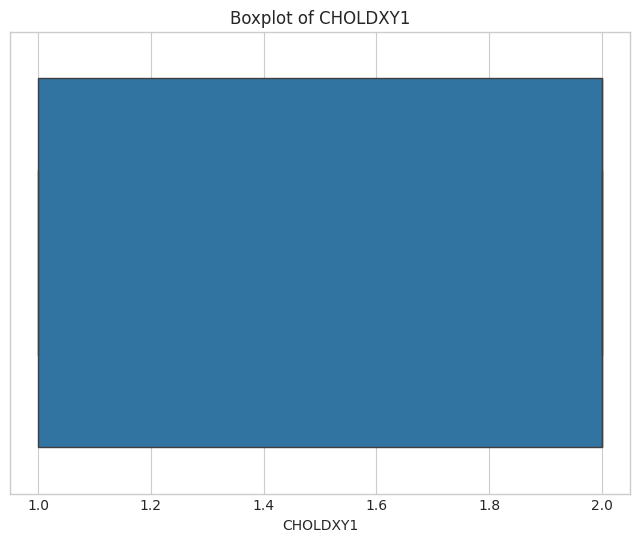

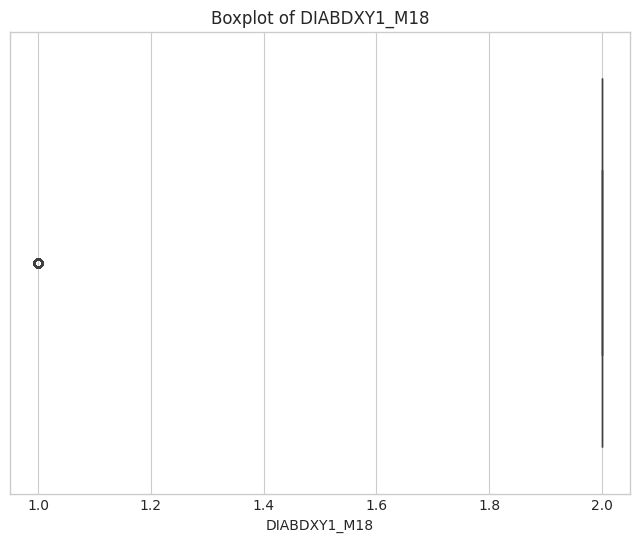

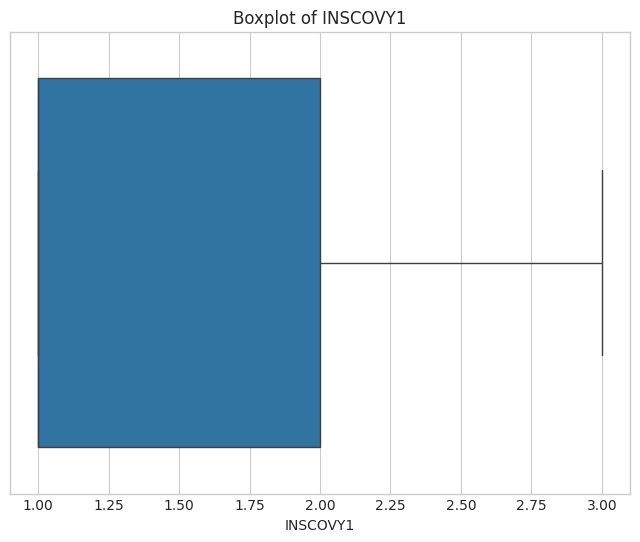

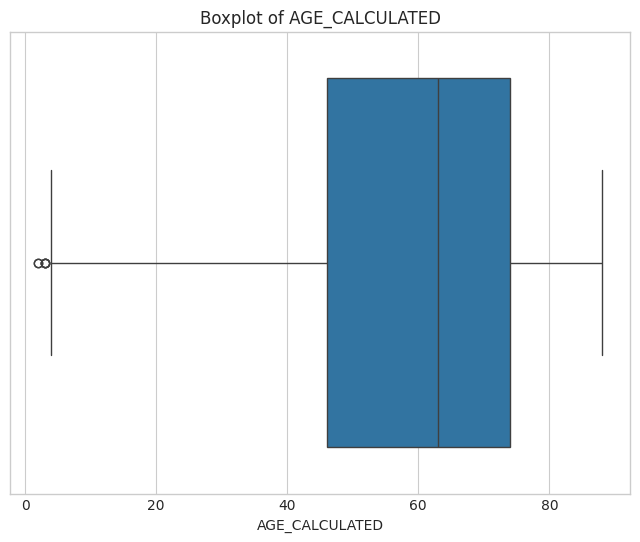

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_columns = des1_meps_agecr.select_dtypes(include=['float64', 'int64'])

# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop through each numerical column to create a boxplot
for i, column in enumerate(numerical_columns.columns):
    plt.figure(figsize=(8, 6))
    
    # Draw a boxplot for the current column
    sns.boxplot(x=numerical_columns[column])
    
    # Set the title of the plot
    plt.title(f'Boxplot of {column}')
    
    # Show the plot
    plt.show()

In [86]:
# Function to calculate outliers
def remove_outliers(des1_meps_agecr):
    # Iterate through each column to remove outliers
    for col in des1_meps_agecr.columns:
        # Only process numerical columns
        if des1_meps_agecr[col].dtype != 'object':
            Q1 = des1_meps_agecr[col].quantile(0.25)
            Q3 = des1_meps_agecr[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            des1_meps_agecr = des1_meps_agecr[(des1_meps_agecr[col] >= lower_bound) & (des1_meps_agecr[col] <= upper_bound)]
    return des1_meps_agecr

# Remove outliers
des1_meps_rmoutl = remove_outliers(des1_meps_agecr)

# Display the cleaned DataFrame
print(des1_meps_rmoutl)

      SEX  MARRYY1X  SPOUINY1  BORNUSA  HIBPDXY1  CHDDXY1  ANGIDXY1  MIDXY1  \
2       1       1.0       1.0      1.0       1.0      2.0       2.0     2.0   
3       1       3.0       2.0      1.0       2.0      2.0       2.0     2.0   
5       2       1.0       1.0      1.0       2.0      2.0       2.0     2.0   
6       1       1.0       1.0      1.0       1.0      2.0       2.0     2.0   
7       2       5.0       2.0      1.0       1.0      2.0       2.0     2.0   
...   ...       ...       ...      ...       ...      ...       ...     ...   
4099    1       5.0       2.0      1.0       2.0      2.0       2.0     2.0   
4100    2       1.0       2.0      1.0       2.0      2.0       2.0     2.0   
4103    2       1.0       1.0      1.0       2.0      2.0       2.0     2.0   
4104    1       1.0       1.0      1.0       2.0      2.0       2.0     2.0   
4109    2       1.0       1.0      1.0       1.0      2.0       2.0     2.0   

      CHOLDXY1  DIABDXY1_M18  INSCOVY1  AGE_CALCULA

In [87]:
des1_meps_rmoutl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 2 to 4109
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEX             2222 non-null   int64  
 1   MARRYY1X        2222 non-null   float64
 2   SPOUINY1        2222 non-null   float64
 3   BORNUSA         2222 non-null   float64
 4   HIBPDXY1        2222 non-null   float64
 5   CHDDXY1         2222 non-null   float64
 6   ANGIDXY1        2222 non-null   float64
 7   MIDXY1          2222 non-null   float64
 8   CHOLDXY1        2222 non-null   float64
 9   DIABDXY1_M18    2222 non-null   float64
 10  INSCOVY1        2222 non-null   float64
 11  AGE_CALCULATED  2222 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 225.7 KB


In [88]:
# One-hot encode categorical features
des1_meps_ohot = pd.get_dummies(des1_meps_rmoutl, columns=['MARRYY1X', 'INSCOVY1'], drop_first=True)
des1_meps_ohot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 2 to 4109
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEX             2222 non-null   int64  
 1   SPOUINY1        2222 non-null   float64
 2   BORNUSA         2222 non-null   float64
 3   HIBPDXY1        2222 non-null   float64
 4   CHDDXY1         2222 non-null   float64
 5   ANGIDXY1        2222 non-null   float64
 6   MIDXY1          2222 non-null   float64
 7   CHOLDXY1        2222 non-null   float64
 8   DIABDXY1_M18    2222 non-null   float64
 9   AGE_CALCULATED  2222 non-null   int64  
 10  MARRYY1X_2.0    2222 non-null   bool   
 11  MARRYY1X_3.0    2222 non-null   bool   
 12  MARRYY1X_4.0    2222 non-null   bool   
 13  MARRYY1X_5.0    2222 non-null   bool   
 14  INSCOVY1_2.0    2222 non-null   bool   
 15  INSCOVY1_3.0    2222 non-null   bool   
dtypes: bool(6), float64(8), int64(2)
memory usage: 204.0 KB


In [ ]:
# Save the clean dataset in a CSV
des1_meps_ohot.to_csv("cleaned_ds1_h244.csv", index=False)

In [90]:
des1_meps_ohot.head(15)


,SEX,SPOUINY1,BORNUSA,HIBPDXY1,CHDDXY1,ANGIDXY1,MIDXY1,CHOLDXY1,DIABDXY1_M18,AGE_CALCULATED,MARRYY1X_2.0,MARRYY1X_3.0,MARRYY1X_4.0,MARRYY1X_5.0,INSCOVY1_2.0,INSCOVY1_3.0
2,1,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,65,False,False,False,False,False,False
3,1,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,70,False,True,False,False,True,False
5,2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,82,False,False,False,False,True,False
6,1,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,83,False,False,False,False,True,False
7,2,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,44,False,False,False,True,False,False
8,1,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,58,False,True,False,False,False,False
9,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,73,False,False,False,False,False,False
10,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,67,False,False,False,False,False,False
13,2,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,72,False,False,False,False,True,False
14,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,49,False,False,False,True,True,False


In [94]:
des1_meps_ohot.describe()

,SEX,SPOUINY1,BORNUSA,HIBPDXY1,CHDDXY1,ANGIDXY1,MIDXY1,CHOLDXY1,DIABDXY1_M18,AGE_CALCULATED
count,2222.000000,2222.000000,2222.0,2222.000000,2222.0,2222.0,2222.0,2222.000000,2222.0,2222.000000
mean,1.536904,1.548605,1.0,1.500000,2.0,2.0,2.0,1.546805,2.0,60.059406
std,0.498749,0.497744,0.0,0.500113,0.0,0.0,0.0,0.497917,0.0,16.775448
min,1.000000,1.000000,1.0,1.000000,2.0,2.0,2.0,1.000000,2.0,20.000000
25%,1.000000,1.000000,1.0,1.000000,2.0,2.0,2.0,1.000000,2.0,48.000000
50%,2.000000,2.000000,1.0,1.500000,2.0,2.0,2.0,2.000000,2.0,63.000000
75%,2.000000,2.000000,1.0,2.000000,2.0,2.0,2.0,2.000000,2.0,73.000000
max,2.000000,2.000000,1.0,2.000000,2.0,2.0,2.0,2.000000,2.0,88.000000


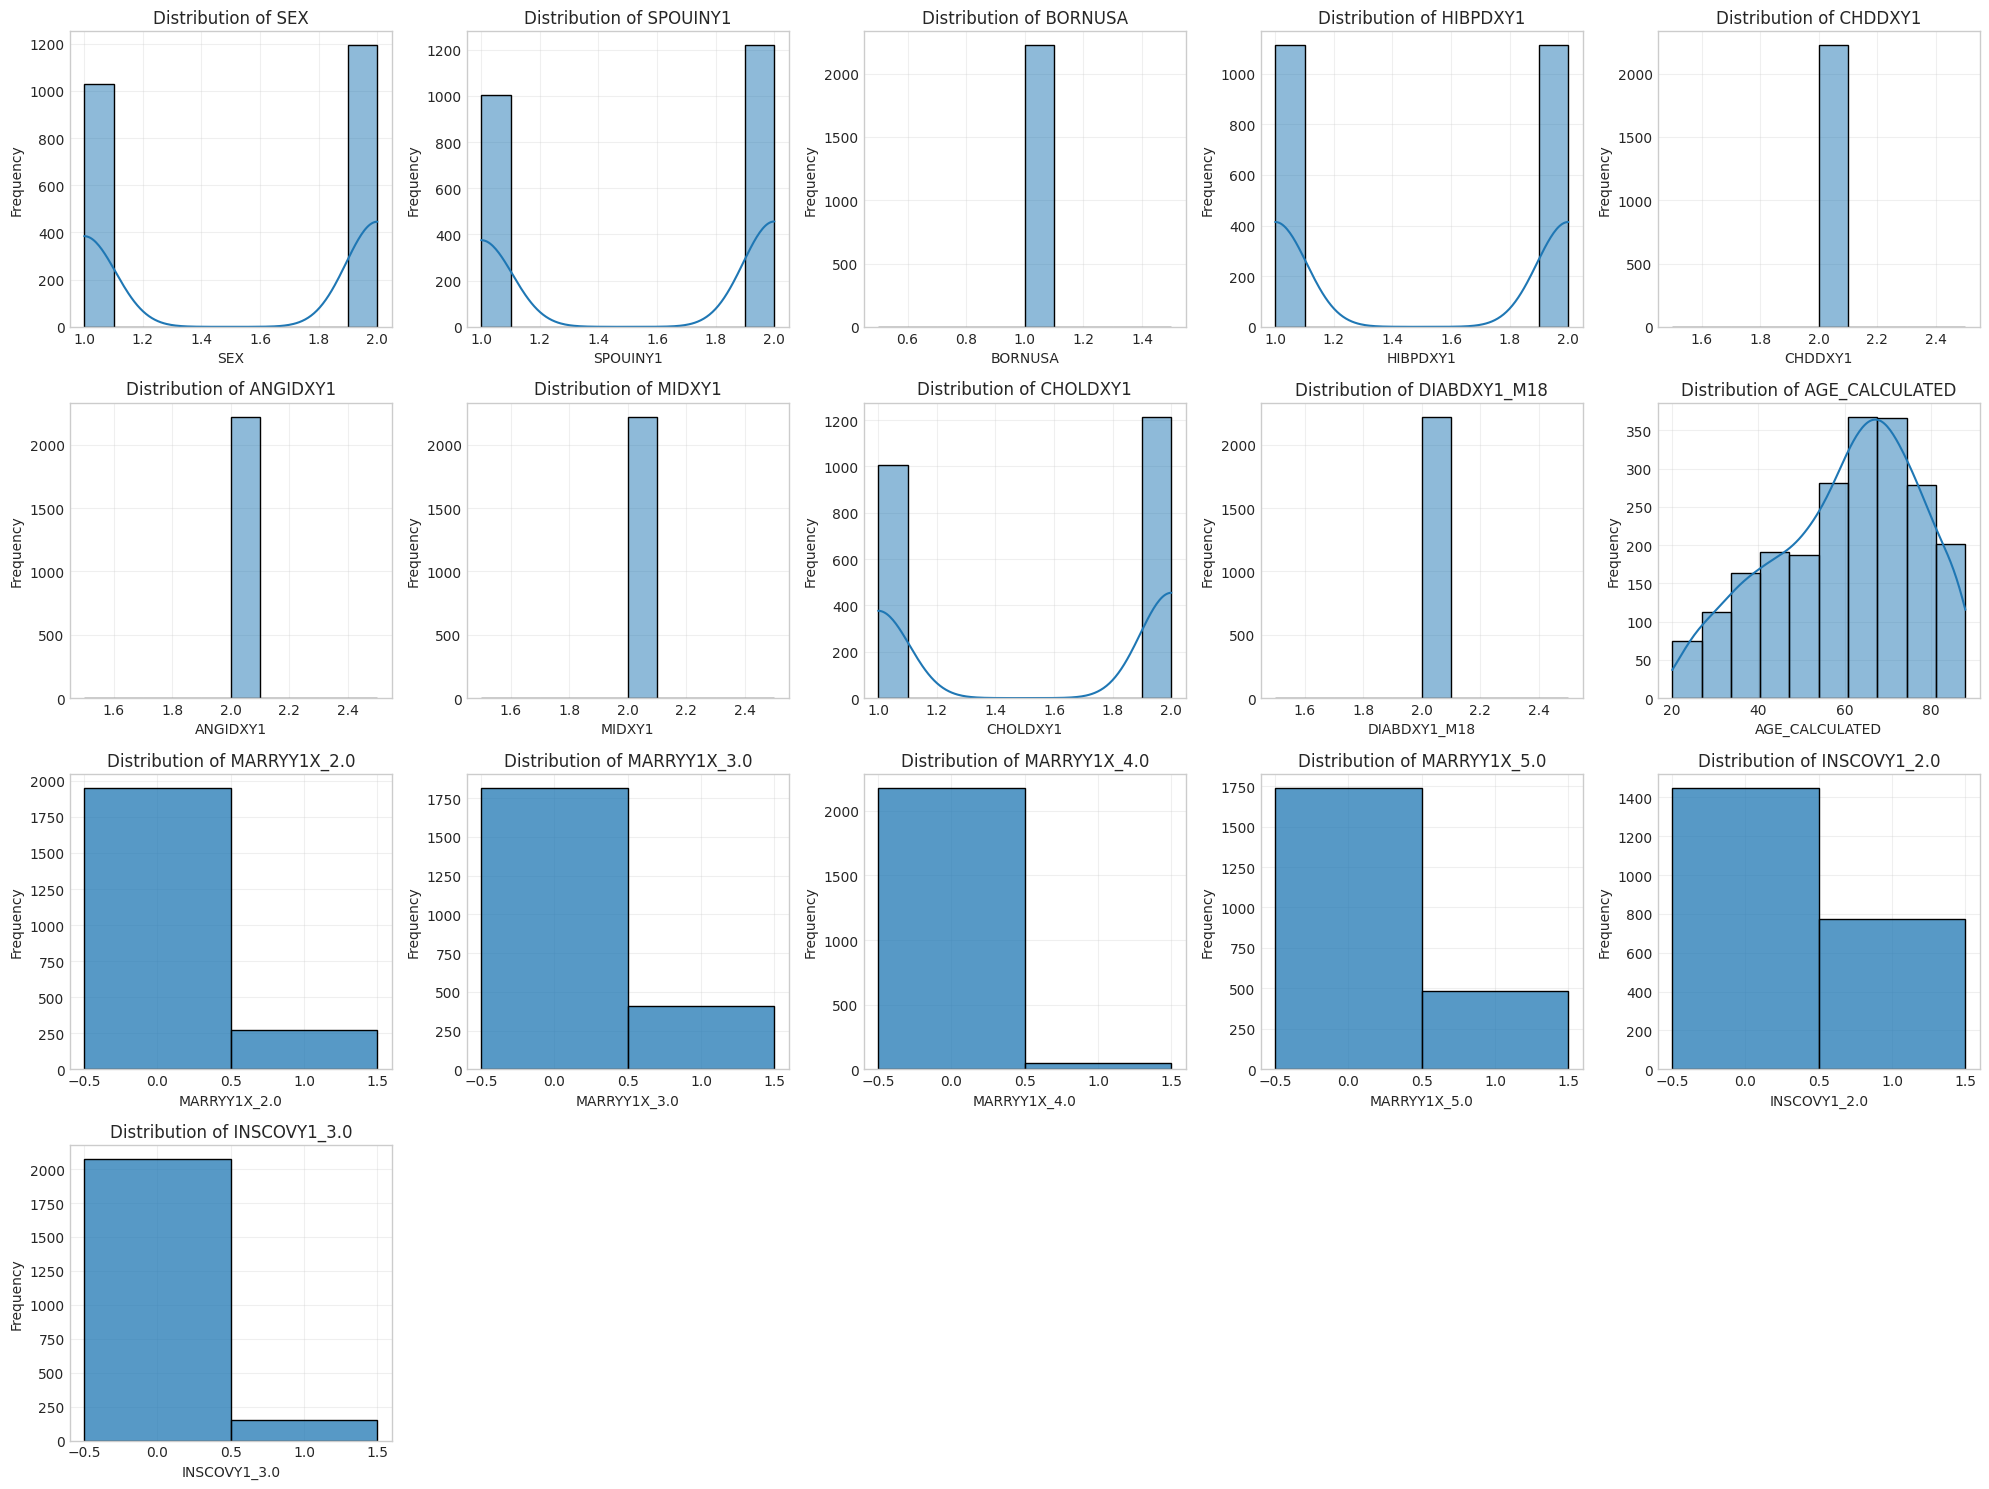

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(des1_meps_ohot.columns, 1):
    plt.subplot(4, 5, i)  # Adjust grid size based on column count
    if des1_meps_ohot[column].dtype in ['bool', 'object']:
        sns.histplot(des1_meps_ohot[column], kde=False, bins=3, discrete=True)
    else:
        sns.histplot(des1_meps_ohot[column], kde=True, bins=10)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1599/3765082224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="SEX", y=des1_meps_ohot[column], data=des1_meps_ohot, palette="viridis")
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 97.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1599/3765082224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

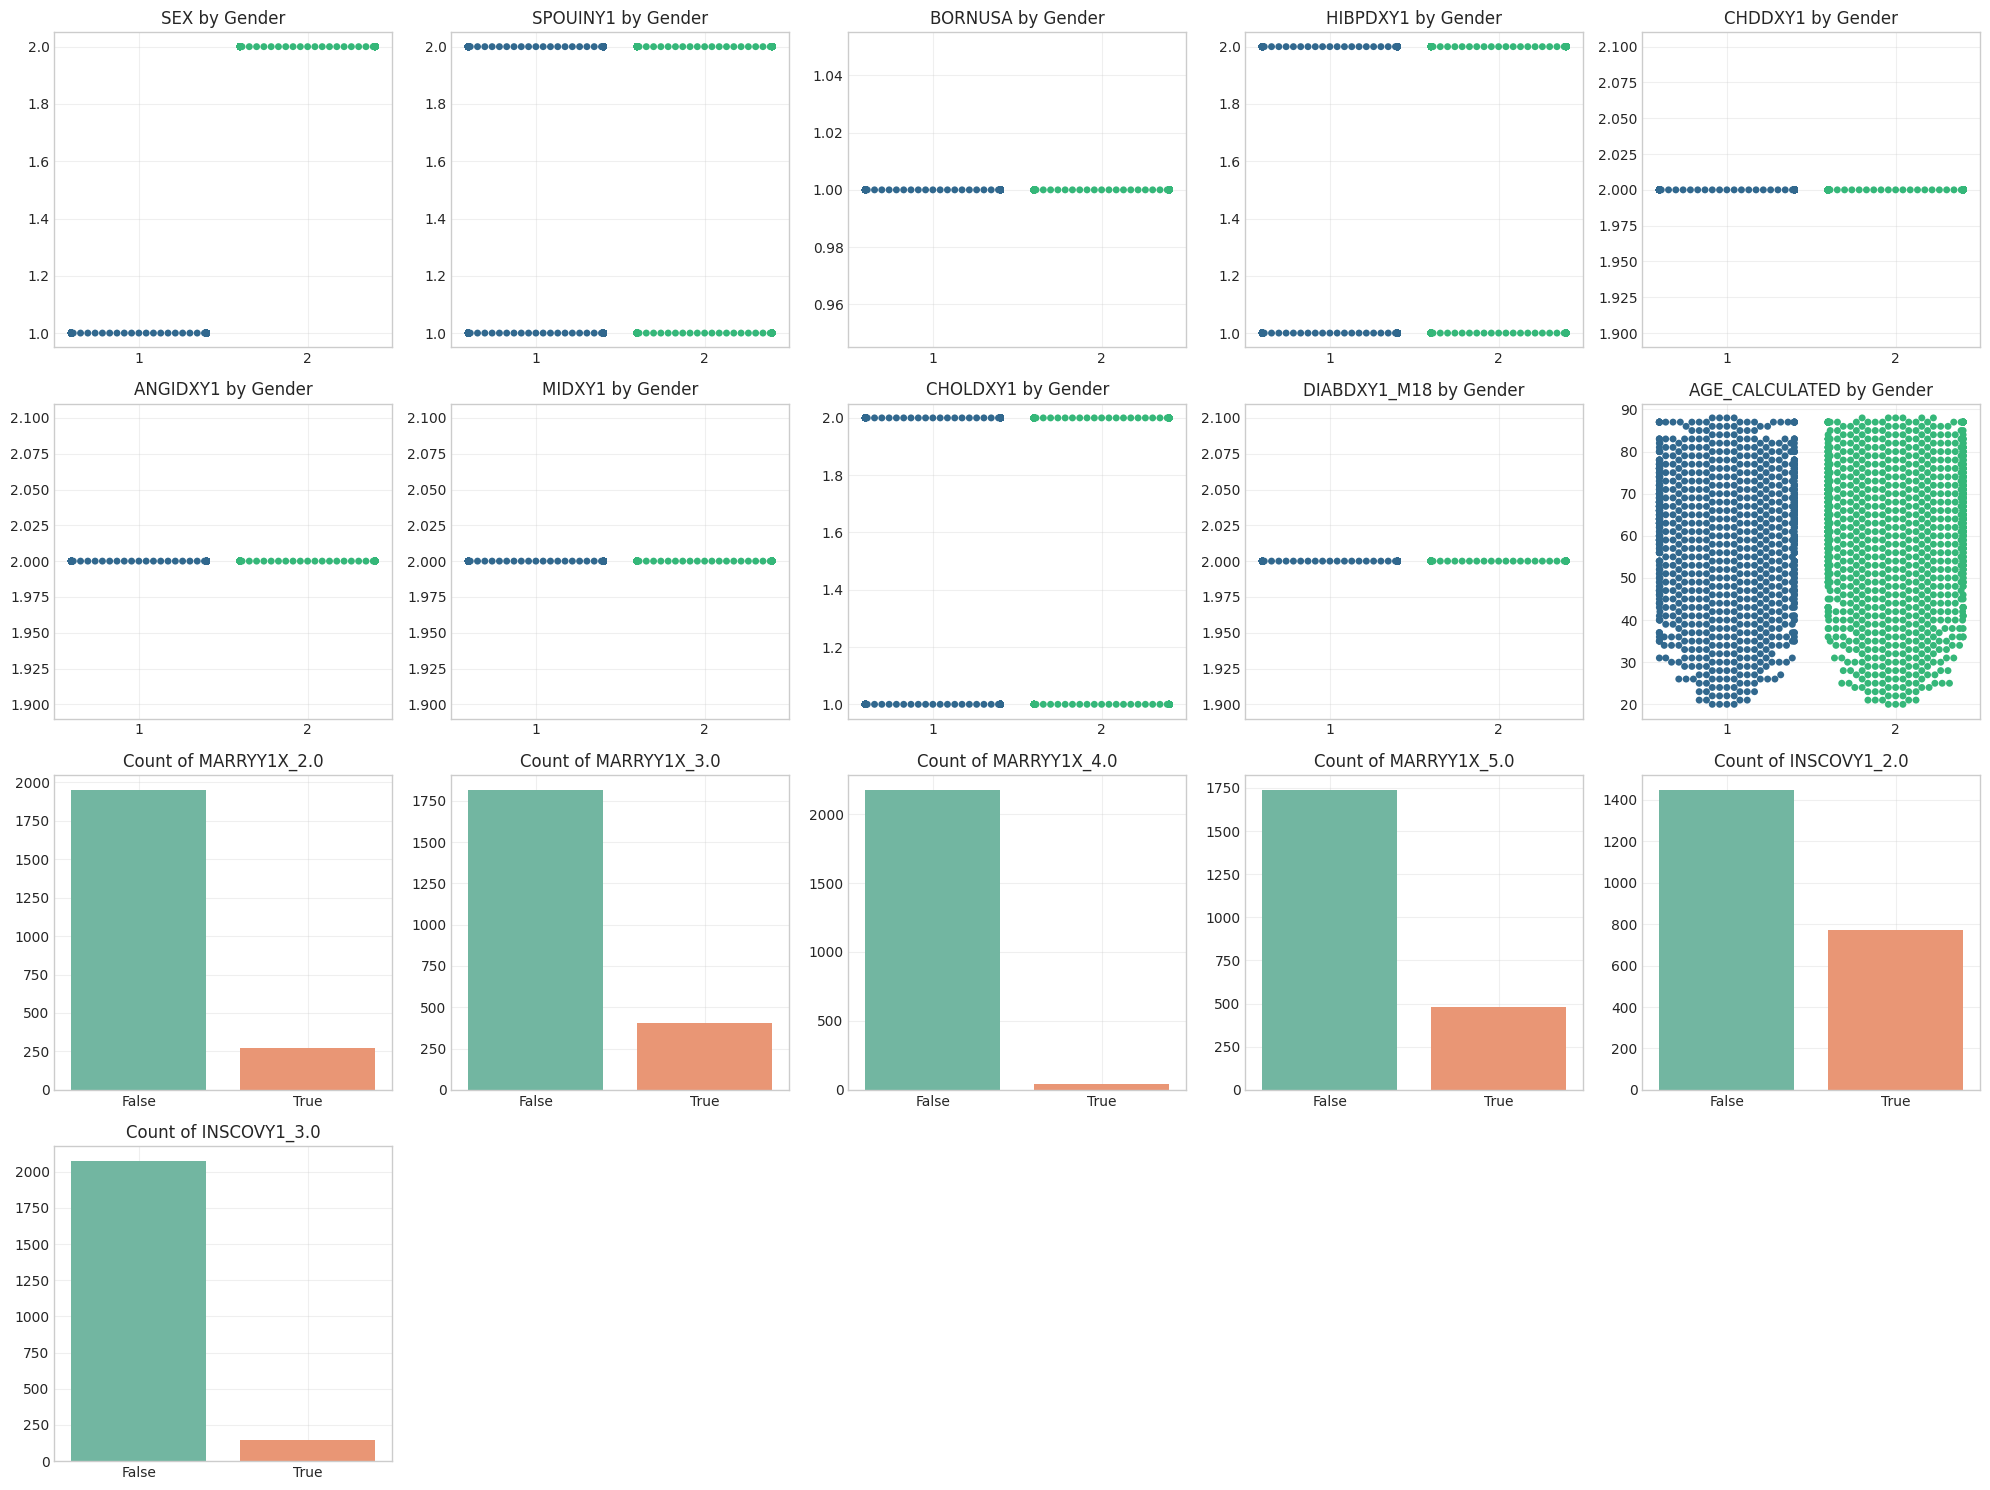

In [92]:
# Plot swarm plots for all columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(des1_meps_ohot.columns, 1):
    plt.subplot(4, 5, i)  # Adjust grid size based on column count (16 columns → 4x5 grid)
    
    if des1_meps_ohot[column].dtype in ['bool', 'object', 'category']:
        # For binary/categorical variables, use count plot
        sns.countplot(x=des1_meps_ohot[column], palette="Set2")
        plt.title(f"Count of {column}")
    else:
        # For numerical variables, use swarm plot (with SEX as categorical axis if available)
        if "SEX" in des1_meps_ohot.columns:
            sns.swarmplot(x="SEX", y=des1_meps_ohot[column], data=des1_meps_ohot, palette="viridis")
            plt.title(f"{column} by Gender")
        else:
            sns.swarmplot(y=des1_meps_ohot[column], color="green")
            plt.title(f"Distribution of {column}")
    
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

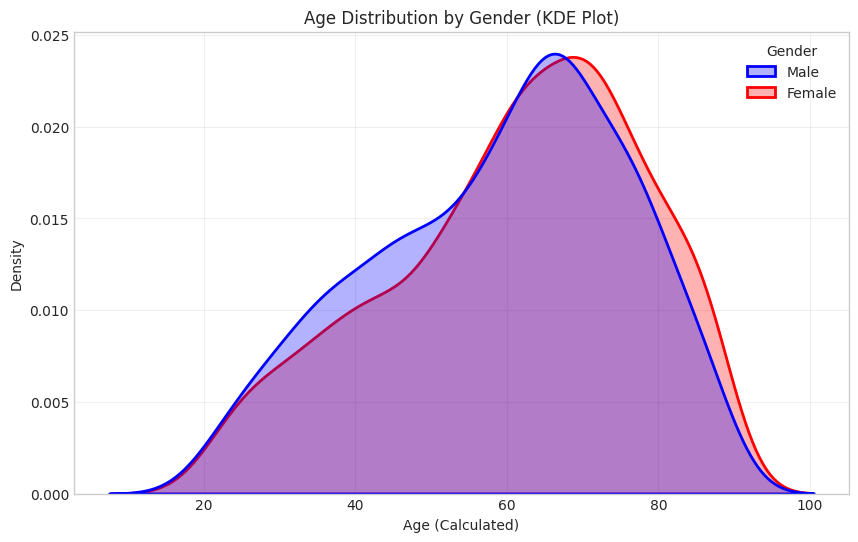

In [93]:
# Create a KDE plot for AGE_CALCULATED stratified by SEX
# Map SEX codes to labels (1=Male, 2=Female)

des1_meps_ohot['Gender'] = des1_meps_ohot['SEX'].map({1: 'Male', 2: 'Female'})

# Create KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=des1_meps_ohot,
    x='AGE_CALCULATED',
    hue='Gender',
    palette={'Male': 'blue', 'Female': 'red'},
    fill=True,
    common_norm=False,
    alpha=0.3,
    linewidth=2
)
plt.title("Age Distribution by Gender (KDE Plot)")
plt.xlabel("Age (Calculated)")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Map BORNUSA codes to labels (1.0 = Born in USA, assume 2.0 = Not born in USA if present)
df['Birthplace'] = df['BORNUSA'].map({1.0: 'Born in USA', 2.0: 'Not Born in USA'})

# Drop rows with missing BORNUSA (if any)
df = df.dropna(subset=['BORNUSA'])

# Create KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='AGE_CALCULATED',
    hue='Birthplace',
    palette={'Born in USA': 'green', 'Not Born in USA': 'orange'},
    fill=True,
    common_norm=False,
    alpha=0.3,
    linewidth=2
)
plt.title("Age Distribution by Birthplace (KDE Plot)")
plt.xlabel("Age (Calculated)")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

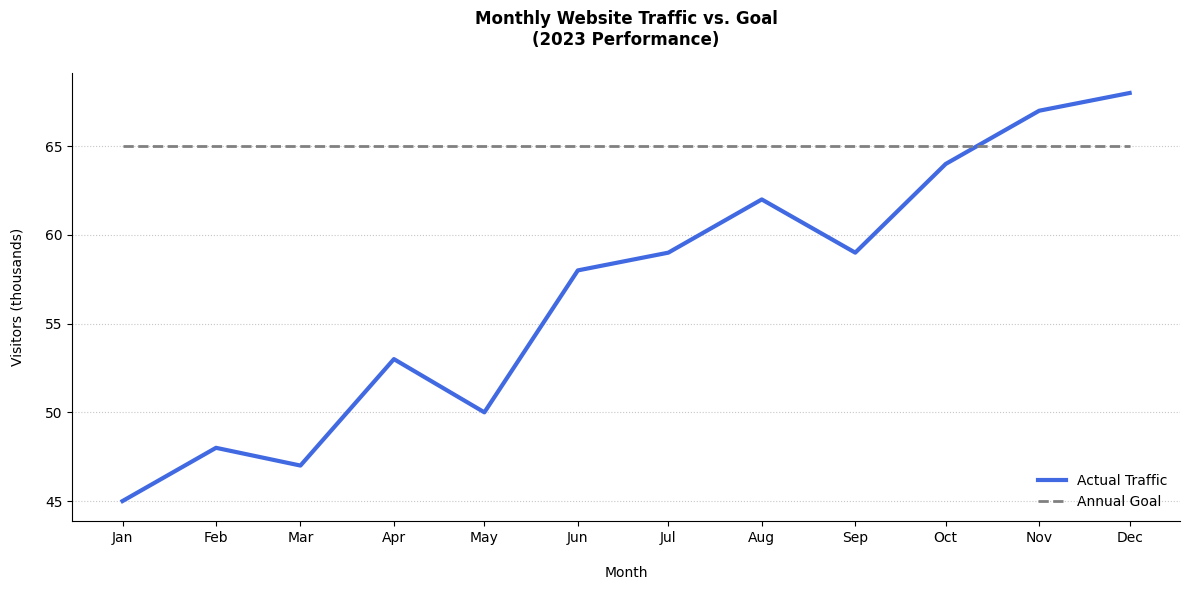

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data
months = [datetime(2023, m, 1) for m in range(1, 13)]
traffic = [45, 48, 47, 53, 50, 58, 59, 62, 59, 64, 67, 68]
goal = [65] * 12  # Flat goal line

# Create figure
plt.figure(figsize=(12, 6))

# Plot lines
plt.plot(months, traffic, color='royalblue', linewidth=3, label='Actual Traffic')
plt.plot(months, goal, color='gray', linestyle='--', linewidth=2, label='Annual Goal')

# Formatting
plt.title('Monthly Website Traffic vs. Goal\n(2023 Performance)', pad=20, fontweight='bold')
plt.xlabel('Month', labelpad=15)
plt.ylabel('Visitors (thousands)', labelpad=15)
plt.grid(axis='y', linestyle=':', alpha=0.7)

# Date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Annotation for goal achievement
plt.annotate('Goal Exceeded!', 
             xy=(months[6], 74), 
             xytext=(months[4], 85),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10)

# Remove spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Legend
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()